# **Suicide Risk Analysis - Module 1 Data Asessment**



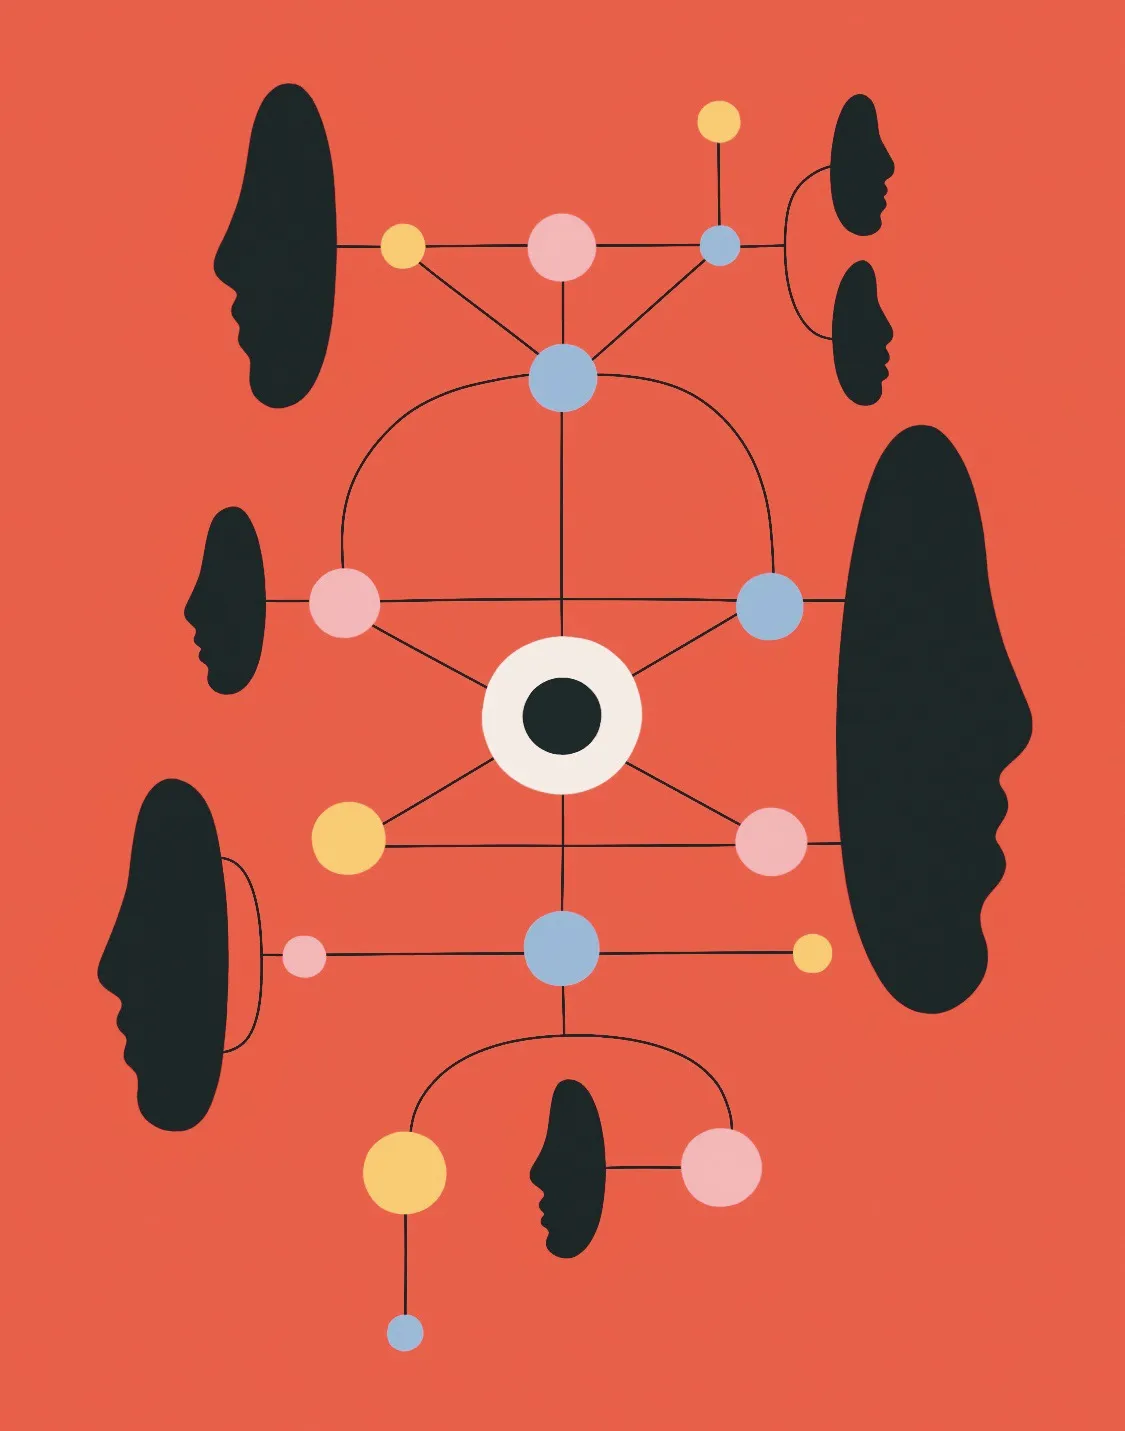

https://www.newyorker.com/magazine/2023/03/06/can-ai-treat-mental-illness

### Stages of the project

###This project is divided into two stages, as modules:

**Module 1. Data availability and suitability assessment**

**Module 2. Predictive Modeling using Machine Learning**

**Module 3. Predictive Modeling using a Synthethic Dataset**

## Planning

This project implements the following frameworks in order to have an appropiate planning and execution, delivering meaningful and trustworthy insights:


*  **Introduction**: Provide an introductory section outlining the background, significance, and objectives of my research. Clearly state the research question and goals.

**Data Gathering**:

* **Data Sources**: Identify data sources that can provide relevant information about individuals’ mental health, behavior, and potential risk factors. These sources may include:
Social media posts and interactions
Medical records (with consent and following ethical guidelines)
Crisis Hotline Call Logs
Online forums and communities
Mobile app usage data (with user consent)
Demographic and socioeconomic data

*  **Data collection**: Detail the sources of data, data acquisition methods, and the dataset's composition. Describe how you obtained and prepared the data, including ethical considerations.

**Data Analysis**:

* **Data preprocessing**: Clean, normalize, and preprocess collected data to make it suitable for analysis.

* **Feature Extraction**: Extract relevant features from data that can serve as potential risk factors. This can include text sentiment analysis, social network analysis, and more.

* **Model selection**: Decide on appropriate models or machine learning techniques to identify risk factors. Neural networks, natural language processing models (e.g. BERT for sentiment analysis) and statistical models could be considered.

* **Training and evaluation**: Train your models using historical data with known outcomes (e.g. suicide cases) and evaluate their performance using metrics such as precision, recall, and F1 score.

**Real-Time Risk Factor Identification**:

* **Streaming Data Processing**: Design a real-time data processing system that can continuously ingest and process new data as it becomes available. Technologies like Apache Kafka, Apache Flink, or Apache Spark Streaming may be useful.

* **Model Deployment**: Deploy your trained models to the real-time processing system. These models should continuously analyze incoming data to identify potential risk factors.

* **Alerting and Notification**: Set up alerts or notifications to flag potential risk factors in real time so that appropriate intervention can be initiated promptly.


  **Intervention and Tackling the Situation**:

 * **Crisis Response System**: Implement a system that can provide immediate support to individuals identified as at-risk. This might include automated messages, contacting crisis hotlines, or notifying relevant authorities.

* **Human Review**: Always involve trained mental health professionals to review and validate the risk factors identified by the system.

* **Privacy and Ethics**: Ensure that your system respects user privacy and adheres to ethical guidelines, including obtaining informed consent for data collection and handling.

**Monitoring and Iteraction**:

Continuously monitor and evaluate the performance of your system, including the accuracy of risk factor identification and the effectiveness of intervention strategies.
Use feedback from mental health professionals and individuals in crisis to improve your system iteratively.

 **Ethical Considerations**:

 Be mindful of ethical considerations, including data privacy, consent, bias in models, and the potential for false positives and negatives.

 **Collaboration**:

 Collaborate with mental health experts, ethicists, and legal professionals to ensure that your project is conducted in a responsible and ethical manner.

 **Legal and Regulatory Compliance**:

Ensure compliance with all relevant laws and regulations regarding data privacy and mental health data handling.


  **Conclusion and Discussion**: In this part, we will discuss the results that we have in the visualization and exploration part. We will conclude how people's emotion change during the time period.

  **Git Versioning**: Will be the  project repository, public access.












## Research Questions

There are some research questions formulated for this research. In the following sections of this notebook, it will be asessed if it is possible to answer those questions with the dataset, or we need a different approach:

These comparisons will be based on data collection from people who committed suicide after being discharged from hospital.

1. Are there statistically significant differences in suicide risk between patients with various types of mental disorders, and can these differences be used to inform targeted intervention strategies?

2. What are the main factors, including demographic and clinical variables, that contribute to the risk of suicide within a year after discharge among patients diagnosed with mental disorders?

3. How do different features or indicators related to mental health, such as depression severity, treatment adherence, or follow-up care, impact the risk of suicide after discharge?

4. Can machine learning models effectively predict the risk of suicide among patients with specific mental disorders, and if so, which models perform best in this context?


#**1. Module 1. Data Assessment**

###**Dependencies Installation**

In [7]:
!pip install pandas
!pip install numpy
#!pip install numpy pandas (it does the same)
!pip install scikit-learn

In [2]:
#importing required libraries
import numpy as np
import pandas as pd                     # data processing, CSV file
# Set the number of max columns and rows that can be visualized:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import missingno as msno                  #Visualization of missing values

import matplotlib.pyplot as plt           #visualisation
%matplotlib inline

import seaborn as sns                     #visualisation
sns.set(color_codes=True)
sns.set(style = 'dark')                   #sns.set(style="darkgrid") also available



In [3]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive



##**1- Data Collection**

##Loading the data into data frame, the dataset is borrowed from website https://stats.oecd.org/

In [4]:
# Importing dataset and examining it
# Read in the data
#data = pd.read_csv("/content/_HEALTH_HCQI_.csv")

# Loading data into data frame (If the data is in .config folder)
#data = pd.read_csv("/content/.config/content_HEALTH_HCQI_.csv", encoding="latin-1")     # encoding in latin-1 do not work good. it is better in utf-8
#data = pd.read_csv("/content/.config/content_HEALTH_HCQI_.csv.csv")

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Suicide Prevention/_HEALTH_HCQI_.csv")
data.head(5)

COU         Country     PER  Periods       IND  \
0  CZE  Czech Republic  TIME09     2009  MORTSUMD   
1  CZE  Czech Republic  TIME09     2009  MORTSUMD   
2  CZE  Czech Republic  TIME09     2009  MORTSUMD   
3  CZE  Czech Republic  TIME10     2010  MORTSUMD   
4  CZE  Czech Republic  TIME10     2010  MORTSUMD   

                                           Indicator GEN Gender       AGE  \
0  Suicide within 1 year after discharge among pa...   T  Total  TOTAL_15   
1  Suicide within 1 year after discharge among pa...   T  Total  TOTAL_15   
2  Suicide within 1 year after discharge among pa...   T  Total  TOTAL_15   
3  Suicide within 1 year after discharge among pa...   T  Total  TOTAL_15   
4  Suicide within 1 year after discharge among pa...   T  Total  TOTAL_15   

               Age Group               VAL  \
0  15 years old and over  AS_STD_RATE_CPAT   
1  15 years old and over            LOW_CI   
2  15 years old and over             UP_CI   
3  15 years old and over  AS_STD_RATE_CPAT   
4  15 years old and over            LOW_CI   

                                        Value  Value.1  Flag Codes  Flags  
0  Age-sex standardised rate per 100 patients     0.30         NaN    NaN  
1                   Lower confidence interval     0.25         NaN    NaN  
2                   Upper confidence interval     0.34         NaN    NaN  
3  Age-sex standardised rate per 100 patients     0.29         NaN    NaN  
4                   Lower confidence interval     0.25         NaN    NaN

In [ ]:
# To display the botton 5 rows
data.tail(5)

COU   Country     PER  Periods       IND  \
4927  SVN  Slovenia  TIME19     2019  MORTSUMS   
4928  SVN  Slovenia  TIME19     2019  MORTSUMS   
4929  SVN  Slovenia  TIME20     2020  MORTSUMS   
4930  SVN  Slovenia  TIME20     2020  MORTSUMS   
4931  SVN  Slovenia  TIME20     2020  MORTSUMS   

                                              Indicator GEN Gender       AGE  \
4927  Suicide within 30 days after discharge among p...   T  Total  TOTAL_15   
4928  Suicide within 30 days after discharge among p...   T  Total  TOTAL_15   
4929  Suicide within 30 days after discharge among p...   T  Total  TOTAL_15   
4930  Suicide within 30 days after discharge among p...   T  Total  TOTAL_15   
4931  Suicide within 30 days after discharge among p...   T  Total  TOTAL_15   

                  Age Group               VAL  \
4927  15 years old and over            LOW_CI   
4928  15 years old and over             UP_CI   
4929  15 years old and over  AS_STD_RATE_CPAT   
4930  15 years old and over            LOW_CI   
4931  15 years old and over             UP_CI   

                                           Value  Value.1  Flag Codes  Flags  
4927                   Lower confidence interval     0.17         NaN    NaN  
4928                   Upper confidence interval     0.36         NaN    NaN  
4929  Age-sex standardised rate per 100 patients     0.16         NaN    NaN  
4930                   Lower confidence interval     0.09         NaN    NaN  
4931                   Upper confidence interval     0.24         NaN    NaN

##**2.Familiarizing with the  data:**

**Exploratory Data Analysis**

In this step, few dataframe methods are used to look into the data and its features.

Printing Type of data to identify problem.

Printing the data types to confirm if there problems in data.

### Checking rows and columns

In [ ]:
#Listing the features of the dataset

data.columns

Index(['COU', 'Country', 'PER', 'Periods', 'IND', 'Indicator', 'GEN', 'Gender',
       'AGE', 'Age Group', 'VAL', 'Value', 'Value.1', 'Flag Codes', 'Flags'],
      dtype='object')

CHECKING THE TYPES OF DATA

In [ ]:
# Print data types of DataFrame
data.dtypes

COU            object
Country        object
PER            object
Periods         int64
IND            object
Indicator      object
GEN            object
Gender         object
AGE            object
Age Group      object
VAL            object
Value          object
Value.1       float64
Flag Codes    float64
Flags         float64
dtype: object

In [ ]:
# Checking rows and columns format
data.info()
# everything looks fine so far, no encoding errors, no special characters.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4932 entries, 0 to 4931
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   COU         4932 non-null   object 
 1   Country     4932 non-null   object 
 2   PER         4932 non-null   object 
 3   Periods     4932 non-null   int64  
 4   IND         4932 non-null   object 
 5   Indicator   4932 non-null   object 
 6   GEN         4932 non-null   object 
 7   Gender      4932 non-null   object 
 8   AGE         4932 non-null   object 
 9   Age Group   4932 non-null   object 
 10  VAL         4932 non-null   object 
 11  Value       4932 non-null   object 
 12  Value.1     4932 non-null   float64
 13  Flag Codes  0 non-null      float64
 14  Flags       0 non-null      float64
dtypes: float64(3), int64(1), object(11)
memory usage: 578.1+ KB


Let's see how many countries are avaialble in the dataset:

In [11]:
unique_countries = data['Country'].nunique()
print("Number of unique countries:", unique_countries)

19

### Consistency

Some of the attributes are a code for a variable, like 'COU' is the code of the country, and the country is in the attribute 'Country'. To evaluate if the values in two categorical variables represent a pair code-value relationship, we can check if each code has a unique corresponding value and vice versa.

Also, in this way we can catch errors of spelling, encoding, typos, etc.

In [ ]:
# some countries report more data and others have less datapoints over time
# we use the method .value_counts() to count how many datapoints we have in each value of the variable
# we also check the consistency of the pair 'COU' 'Country'
data[['COU', 'Country']].value_counts()

COU  Country        
ISR  Israel             507
SWE  Sweden             474
DNK  Denmark            402
ISL  Iceland            390
FIN  Finland            384
CHL  Chile              315
CZE  Czech Republic     306
LTU  Lithuania          306
NZL  New Zealand        300
KOR  Korea              282
LVA  Latvia             252
NLD  Netherlands        168
SVN  Slovenia           162
COL  Colombia           156
GBR  United Kingdom     126
CAN  Canada             126
NOR  Norway              96
MLT  Malta               90
SVK  Slovak Republic     90
Name: count, dtype: int64

In [ ]:
# lets see how much data is available for which years (table is ordered by number of datapoints)
# we use the method .value_counts() to count how many datapoints we have in each value of the variable
# We also check the consistency of the pair 'PER' 'Periods'
data[['PER', 'Periods']].value_counts()
# we have 23 possible periods. Data is missing in more recent and more earlier years

PER     Periods
TIME17  2017       375
TIME16  2016       375
TIME12  2012       336
TIME13  2013       336
TIME18  2018       333
TIME15  2015       321
TIME14  2014       321
TIME19  2019       315
TIME11  2011       276
TIME20  2020       261
TIME10  2010       237
TIME09  2009       207
TIME08  2008       168
TIME21  2021       156
TIME07  2007       132
TIME06  2006       129
TIME05  2005       129
TIME04  2004       105
TIME03  2003       105
TIME02  2002       105
TIME01  2001       102
TIME00  2000        96
TIME22  2022        12
Name: count, dtype: int64

In [ ]:
# What does the pair 'IND' 'Indicator' variable describes?
# we use the method .value_counts() to count how many datapoints we have in each value of the variable
data[['IND', 'Indicator']].value_counts()
# It seems to indicate that these 4 variables have different meaning and may or may not be of the same nature, or in the same scale or interpretation


IND       Indicator                                                                             
MORTSUMS  Suicide within 30 days after discharge among patients diagnosed with a mental disorder    1974
MORTSUMD  Suicide within 1 year after discharge among patients diagnosed with a mental disorder     1971
EXCESCHI  Excess mortality for patients diagnosed with schizophrenia                                 531
EXCEBIPO  Excess mortality for patients diagnosed with bipolar disorder                              456
Name: count, dtype: int64

In [ ]:
# What does the 'Gender' variable describes?
# We also check the consistency of the pair 'GEN' 'Gender':
data[['GEN', 'Gender']].value_counts()

GEN  Gender
T    Total     1646
F    Female    1643
M    Male      1643
Name: count, dtype: int64

In [ ]:
# What does the attributes 'VAL', 'Value' and 'Value.1' describe?
data[['VAL', 'Value']].value_counts()
# It seems that the Suicide rate  is reported as a P-value with lower and higher confidence limits
# 'Value.1' stores the numerica value of the variable, while 'Value' stores its name and 'VAL' has the code of its name

VAL               Value                                     
AS_STD_RATE_CPAT  Age-sex standardised rate per 100 patients    1315
LOW_CI            Lower confidence interval                     1315
UP_CI             Upper confidence interval                     1315
AS_STD_RATIO      Age-sex standardised ratio                     987
Name: count, dtype: int64

### Relevance

In [ ]:
# The attribute 'AGE' describes the entire adult population
data[['AGE', "Age Group"]].value_counts()
# Both values mean the same age group

AGE         Age Group            
TOTAL_15    15 years old and over    3945
TOTAL_1574  15-74 years old           987
Name: count, dtype: int64

In [ ]:
# The attribute 'Flags' does not store any information
data[['Flag Codes', 'Flags']].value_counts()

Series([], Name: count, dtype: int64)

#### DROPPING IRRELEVANT COLUMNS

In [5]:
# Eliminate irrelevant columns:
dataset = data.drop(columns=['AGE', "Age Group", 'Flag Codes', 'Flags'], inplace=False)
#Listing the features of the dataset
dataset.columns

Index(['COU', 'Country', 'PER', 'Periods', 'IND', 'Indicator', 'GEN', 'Gender',
       'VAL', 'Value', 'Value.1'],
      dtype='object')

#### DROPPING THE DUPLICATE ROWS

In [28]:
dataset.shape

(4932, 11)

In [ ]:
duplicate_rows_data = dataset[dataset.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)
# there is no duplicate rows!

number of duplicate rows:  (0, 11)


In [ ]:
# Used to count the number of rows
dataset.count()

COU          4932
Country      4932
PER          4932
Periods      4932
IND          4932
Indicator    4932
GEN          4932
Gender       4932
VAL          4932
Value        4932
Value.1      4932
dtype: int64

In [ ]:
dataset.drop_duplicates().shape

(4932, 11)

#### Statistical meaning

Standardized rate and standardized ratio are both statistical measures used to make meaningful comparisons between populations, particularly when comparing groups with different characteristics. However, they are used for different types of data and express different types of relationships:

Standardized Rate:

        A standardized rate is used to compare the occurrence of an event or condition, typically a count or rate, between two or more populations while accounting for differences in population composition.
        It is often used in situations where you want to compare the rates of an event, such as mortality or disease incidence, in different populations, but these populations have different age, gender, or other demographic compositions.
        Standardized rates are expressed per a standard population, which means that the rates are recalculated as if all populations being compared had the same demographic distribution.
        The formula for a standardized rate is often as follows: (Observed count or rate / Standard population count or rate) * 100 or *1,000 to express it per a standard population size.

Standardized Ratio:

        A standardized ratio is used to compare two quantities, typically ratios, between two or more populations while adjusting for differences in population characteristics.
        It is often used in situations where you want to compare the relationship between two variables, such as comparing the sex-specific incidence rate of a disease in one population to that in another population.
        Standardized ratios adjust for differences in the distribution of a specific variable, such as age or gender, to make fair comparisons between populations.
        The formula for a standardized ratio often involves dividing the observed ratio in the population of interest by the expected ratio based on the standard population's distribution of the characteristic of interest.

In summary, the key difference is in what they are used for and what they express:

    Standardized rates compare the occurrence of an event or condition between populations, adjusting for differences in demographics.
    Standardized ratios compare the relationship between two variables or ratios between populations, adjusting for differences in a specific characteristic (e.g., age, gender) within those populations.

Both standardized rates and ratios are valuable tools in epidemiology, public health, and social sciences for making valid comparisons between populations with different characteristics. The choice between them depends on the research question and the type of data being analyzed.

In [ ]:
# Have a statistical description of the dataset (only work with numerical values):
#pata.describe_option
dataset.describe()
# the problem is that 'Value.1' stores data from 4 different variables, as described in attributes 'VAL' and 'Value'

Periods      Value.1
count  4932.000000  4932.000000
mean   2012.738443     0.865067
std       5.461626     1.398801
min    2000.000000    -0.130000
25%    2009.000000     0.110000
50%    2014.000000     0.260000
75%    2017.000000     0.680000
max    2022.000000    10.400000

In [ ]:
# Visualizing the an statistical description of the values stored in the variable 'Value.1'
dataset[['Indicator', 'Value', 'Value.1']].groupby(["Indicator", "Value"]).agg(['count', 'size', 'mean', 'median', 'min', 'max', 'std', 'var'])#.reset_index(name='Count')

Value.1  \
                                                                                                count   
Indicator                                          Value                                                
Excess mortality for patients diagnosed with bi... Age-sex standardised ratio                     456   
Excess mortality for patients diagnosed with sc... Age-sex standardised ratio                     531   
Suicide within 1 year after discharge among pat... Age-sex standardised rate per 100 patients     657   
                                                   Lower confidence interval                      657   
                                                   Upper confidence interval                      657   
Suicide within 30 days after discharge among pa... Age-sex standardised rate per 100 patients     658   
                                                   Lower confidence interval                      658   
                                                   Upper confidence interval                      658   

                                                                                                    \
                                                                                              size   
Indicator                                          Value                                             
Excess mortality for patients diagnosed with bi... Age-sex standardised ratio                  456   
Excess mortality for patients diagnosed with sc... Age-sex standardised ratio                  531   
Suicide within 1 year after discharge among pat... Age-sex standardised rate per 100 patients  657   
                                                   Lower confidence interval                   657   
                                                   Upper confidence interval                   657   
Suicide within 30 days after discharge among pa... Age-sex standardised rate per 100 patients  658   
                                                   Lower confidence interval                   658   
                                                   Upper confidence interval                   658   

                                                                                                         \
                                                                                                   mean   
Indicator                                          Value                                                  
Excess mortality for patients diagnosed with bi... Age-sex standardised ratio                  2.815570   
Excess mortality for patients diagnosed with sc... Age-sex standardised ratio                  3.688136   
Suicide within 1 year after discharge among pat... Age-sex standardised rate per 100 patients  0.401355   
                                                   Lower confidence interval                   0.294033   
                                                   Upper confidence interval                   0.508767   
Suicide within 30 days after discharge among pa... Age-sex standardised rate per 100 patients  0.118131   
                                                   Lower confidence interval                   0.061687   
                                                   Upper confidence interval                   0.174407   

                                                                                                      \
                                                                                              median   
Indicator                                          Value                                               
Excess mortality for patients diagnosed with bi... Age-sex standardised ratio                  2.700   
Excess mortality for patients diagnosed with sc... Age-sex standardised ratio                  3.700   
Suicide within 1 year after discharge among pat... Age-sex standardised rate per 100 patients  0.390   
             

### Missing Values


In [ ]:
print("Are there any missing values in the dataset ?", data.isnull().values.any())

Are there any missing values in the dataset ? True


In [ ]:
# using notnull()
data.notnull().value_counts()

COU   Country  PER   Periods  IND   Indicator  GEN   Gender  AGE   Age Group  VAL   Value  Value.1  Flag Codes  Flags
True  True     True  True     True  True       True  True    True  True       True  True   True     False       False    4932
Name: count, dtype: int64

In [ ]:
# check missing values
data.isnull().value_counts()
# Yes, the missing data is the Flags

COU    Country  PER    Periods  IND    Indicator  GEN    Gender  AGE    Age Group  VAL    Value  Value.1  Flag Codes  Flags
False  False    False  False    False  False      False  False   False  False      False  False  False    True        True     4932
Name: count, dtype: int64

In [ ]:
# Where are the missing or null values?
# sum of missing values: by default axis = 0
data.isnull().sum()

COU              0
Country          0
PER              0
Periods          0
IND              0
Indicator        0
GEN              0
Gender           0
AGE              0
Age Group        0
VAL              0
Value            0
Value.1          0
Flag Codes    4932
Flags         4932
dtype: int64

In [ ]:
# Calculate how the dataframe would change if dropping the missing values
print("Shape: \n", dataset.dropna().shape, "\n")
print("Count of values: \n", dataset.dropna().count(), "\n")
print("Missing values: \n", dataset.dropna().isnull().sum())

Shape: 
 (4932, 11) 

Count of values: 
 COU          4932
Country      4932
PER          4932
Periods      4932
IND          4932
Indicator    4932
GEN          4932
Gender       4932
VAL          4932
Value        4932
Value.1      4932
dtype: int64 

Missing values: 
 COU          0
Country      0
PER          0
Periods      0
IND          0
Indicator    0
GEN          0
Gender       0
VAL          0
Value        0
Value.1      0
dtype: int64


In [ ]:
# Using the method .nunique() instead of  '.value_counts()', but it gives us more information, as we can understand where and why some values may be missing
dataset.groupby(['IND', 'Indicator']).nunique()

COU  Country  \
IND      Indicator                                                          
EXCEBIPO Excess mortality for patients diagnosed with bi...   13       13   
EXCESCHI Excess mortality for patients diagnosed with sc...   14       14   
MORTSUMD Suicide within 1 year after discharge among pat...   19       19   
MORTSUMS Suicide within 30 days after discharge among pa...   19       19   

                                                             PER  Periods  \
IND      Indicator                                                          
EXCEBIPO Excess mortality for patients diagnosed with bi...   23       23   
EXCESCHI Excess mortality for patients diagnosed with sc...   23       23   
MORTSUMD Suicide within 1 year after discharge among pat...   22       22   
MORTSUMS Suicide within 30 days after discharge among pa...   22       22   

                                                             GEN  Gender  VAL  \
IND      Indicator                                                              
EXCEBIPO Excess mortality for patients diagnosed with bi...    3       3    1   
EXCESCHI Excess mortality for patients diagnosed with sc...    3       3    1   
MORTSUMD Suicide within 1 year after discharge among pat...    3       3    3   
MORTSUMS Suicide within 30 days after discharge among pa...    3       3    3   

                                                             Value  Value.1  
IND      Indicator                                                           
EXCEBIPO Excess mortality for patients diagnosed with bi...      1       62  
EXCESCHI Excess mortality for patients diagnosed with sc...      1       70  
MORTSUMD Suicide within 1 year after discharge among pat...      3      135  
MORTSUMS Suicide within 30 days after discharge among pa...      3       66

In [ ]:
# Pair VAL Value
dataset.groupby(['VAL', 'Value']).nunique()

COU  Country  \
VAL              Value                                                      
AS_STD_RATE_CPAT Age-sex standardised rate per 100 patients   19       19   
AS_STD_RATIO     Age-sex standardised ratio                   14       14   
LOW_CI           Lower confidence interval                    19       19   
UP_CI            Upper confidence interval                    19       19   

                                                             PER  Periods  \
VAL              Value                                                      
AS_STD_RATE_CPAT Age-sex standardised rate per 100 patients   22       22   
AS_STD_RATIO     Age-sex standardised ratio                   23       23   
LOW_CI           Lower confidence interval                    22       22   
UP_CI            Upper confidence interval                    22       22   

                                                             IND  Indicator  \
VAL              Value                                                        
AS_STD_RATE_CPAT Age-sex standardised rate per 100 patients    2          2   
AS_STD_RATIO     Age-sex standardised ratio                    2          2   
LOW_CI           Lower confidence interval                     2          2   
UP_CI            Upper confidence interval                     2          2   

                                                             GEN  Gender  \
VAL              Value                                                     
AS_STD_RATE_CPAT Age-sex standardised rate per 100 patients    3       3   
AS_STD_RATIO     Age-sex standardised ratio                    3       3   
LOW_CI           Lower confidence interval                     3       3   
UP_CI            Upper confidence interval                     3       3   

                                                             Value.1  
VAL              Value                                                
AS_STD_RATE_CPAT Age-sex standardised rate per 100 patients      102  
AS_STD_RATIO     Age-sex standardised ratio                       79  
LOW_CI           Lower confidence interval                        98  
UP_CI            Upper confidence interval                       121

In [ ]:
# Where are some data missing relatively to the 'Gender' variable?
dataset.groupby(['GEN', 'Gender']).nunique()

COU  Country  PER  Periods  IND  Indicator  VAL  Value  Value.1
GEN Gender                                                                 
F   Female   19       19   23       23    4          4    4      4      169
M   Male     19       19   23       23    4          4    4      4      182
T   Total    19       19   23       23    4          4    4      4      158

In [ ]:
# Pair COU Country
dataset.groupby(['COU', 'Country']).nunique()

PER  Periods  IND  Indicator  GEN  Gender  VAL  Value  \
COU Country                                                                  
CAN Canada            18       18    3          3    3       3    4      4   
CHL Chile             15       15    4          4    3       3    4      4   
COL Colombia           9        9    2          2    3       3    3      3   
CZE Czech Republic    13       13    4          4    3       3    4      4   
DNK Denmark           18       18    4          4    3       3    4      4   
FIN Finland           17       17    4          4    3       3    4      4   
GBR United Kingdom     7        7    2          2    3       3    3      3   
ISL Iceland           23       23    4          4    3       3    4      4   
ISR Israel            23       23    4          4    3       3    4      4   
KOR Korea             14       14    4          4    3       3    4      4   
LTU Lithuania         21       21    4          4    3       3    4      4   
LVA Latvia            12       12    4          4    3       3    4      4   
MLT Malta              5        5    2          2    3       3    3      3   
NLD Netherlands        9        9    4          4    3       3    4      4   
NOR Norway            10       10    4          4    3       3    4      4   
NZL New Zealand       16       16    4          4    3       3    4      4   
SVK Slovak Republic    5        5    2          2    3       3    3      3   
SVN Slovenia           9        9    2          2    3       3    3      3   
SWE Sweden            22       22    4          4    3       3    4      4   

                     Value.1  
COU Country                   
CAN Canada                42  
CHL Chile                 83  
COL Colombia              35  
CZE Czech Republic        98  
DNK Denmark              118  
FIN Finland               93  
GBR United Kingdom        22  
ISL Iceland               54  
ISR Israel               104  
KOR Korea                 81  
LTU Lithuania             90  
LVA Latvia                68  
MLT Malta                 34  
NLD Netherlands           92  
NOR Norway                71  
NZL New Zealand          101  
SVK Slovak Republic       47  
SVN Slovenia              81  
SWE Sweden                99

In [ ]:
# Pair PER Periods
dataset.groupby(['PER', 'Periods']).nunique()

COU  Country  IND  Indicator  GEN  Gender  VAL  Value  Value.1
PER    Periods                                                                
TIME00 2000       5        5    4          4    3       3    4      4       58
TIME01 2001       6        6    4          4    3       3    4      4       64
TIME02 2002       7        7    4          4    3       3    4      4       62
TIME03 2003       7        7    4          4    3       3    4      4       65
TIME04 2004       7        7    4          4    3       3    4      4       70
TIME05 2005       8        8    4          4    3       3    4      4       67
TIME06 2006       8        8    4          4    3       3    4      4       78
TIME07 2007       9        9    4          4    3       3    4      4       71
TIME08 2008      10       10    4          4    3       3    4      4       87
TIME09 2009      12       12    4          4    3       3    4      4       86
TIME10 2010      13       13    4          4    3       3    4      4      103
TIME11 2011      15       15    4          4    3       3    4      4      105
TIME12 2012      17       17    4          4    3       3    4      4      125
TIME13 2013      17       17    4          4    3       3    4      4      121
TIME14 2014      17       17    4          4    3       3    4      4      122
TIME15 2015      17       17    4          4    3       3    4      4      126
TIME16 2016      18       18    4          4    3       3    4      4      120
TIME17 2017      18       18    4          4    3       3    4      4      121
TIME18 2018      15       15    4          4    3       3    4      4      125
TIME19 2019      15       15    4          4    3       3    4      4      118
TIME20 2020      13       13    4          4    3       3    4      4      116
TIME21 2021      10       10    4          4    3       3    4      4       65
TIME22 2022       2        2    2          2    3       3    1      1        7

In [ ]:
#Visualizing the variables that are in the data, looking for missing values
dataset[['Indicator', 'Gender', 'Value', 'Value.1']].groupby(["Indicator", 'Gender', "Value"]).agg(['count', 'size', 'mean', 'median', 'min', 'max', 'std', 'var'])#.reset_index(name='Count')

Value.1  \
                                                                                                       count   
Indicator                                          Gender Value                                                
Excess mortality for patients diagnosed with bi... Female Age-sex standardised ratio                     152   
                                                   Male   Age-sex standardised ratio                     152   
                                                   Total  Age-sex standardised ratio                     152   
Excess mortality for patients diagnosed with sc... Female Age-sex standardised ratio                     177   
                                                   Male   Age-sex standardised ratio                     177   
                                                   Total  Age-sex standardised ratio                     177   
Suicide within 1 year after discharge among pat... Female Age-sex standardised rate per 100 patients     219   
                                                          Lower confidence interval                      219   
                                                          Upper confidence interval                      219   
                                                   Male   Age-sex standardised rate per 100 patients     219   
                                                          Lower confidence interval                      219   
                                                          Upper confidence interval                      219   
                                                   Total  Age-sex standardised rate per 100 patients     219   
                                                          Lower confidence interval                      219   
                                                          Upper confidence interval                      219   
Suicide within 30 days after discharge among pa... Female Age-sex standardised rate per 100 patients     219   
                                                          Lower confidence interval                      219   
                                                          Upper confidence interval                      219   
                                                   Male   Age-sex standardised rate per 100 patients     219   
                                                          Lower confidence interval                      219   
                                                          Upper confidence interval                      219   
                                                   Total  Age-sex standardised rate per 100 patients     220   
                                                          Lower confidence interval                      220   
                                                          Upper confidence interval                      220   

                                                                                                           \
                                                                                                     size   
Indicator                                          Gender Value                                             
Excess mortality for patients diagnosed with bi... Female Age-sex standardised ratio                  152   
                                                   Male   Age-sex standardised ratio                  152   
                                                   Total  Age-sex standardised ratio                  152   
Excess mortality for patients diagnosed with sc... Female Age-sex standardised ratio                  177   
                                                   Male   Age-sex standardised ratio                  177   
                                                   Total  Age-sex standardised ratio                  177   
Suicide within 1 year after discharge among pat... Female Age-sex standardised rate per 100 pat

In [ ]:
# How many datapoints are for each combination of country, indicator, and value?
# We are expecting one datapoint for each year, 23 in total.
dataset[['Country','Periods', 'Indicator', 'Gender', 'Value', 'Value.1']].groupby(['Country', 'Indicator']).nunique()

Periods  \
Country         Indicator                                                     
Canada          Excess mortality for patients diagnosed with sc...       18   
                Suicide within 1 year after discharge among pat...        4   
                Suicide within 30 days after discharge among pa...        4   
Chile           Excess mortality for patients diagnosed with bi...        7   
                Excess mortality for patients diagnosed with sc...       14   
                Suicide within 1 year after discharge among pat...       14   
                Suicide within 30 days after discharge among pa...       14   
Colombia        Suicide within 1 year after discharge among pat...        9   
                Suicide within 30 days after discharge among pa...        9   
Czech Republic  Excess mortality for patients diagnosed with bi...       12   
                Excess mortality for patients diagnosed with sc...       12   
                Suicide within 1 year after discharge among pat...       13   
                Suicide within 30 days after discharge among pa...       13   
Denmark         Excess mortality for patients diagnosed with bi...       13   
                Excess mortality for patients diagnosed with sc...       13   
                Suicide within 1 year after discharge among pat...       18   
                Suicide within 30 days after discharge among pa...       18   
Finland         Excess mortality for patients diagnosed with bi...       13   
                Excess mortality for patients diagnosed with sc...       13   
                Suicide within 1 year after discharge among pat...       17   
                Suicide within 30 days after discharge among pa...       17   
Iceland         Excess mortality for patients diagnosed with bi...        2   
                Excess mortality for patients diagnosed with sc...        2   
                Suicide within 1 year after discharge among pat...       21   
                Suicide within 30 days after discharge among pa...       21   
Israel          Excess mortality for patients diagnosed with bi...       23   
                Excess mortality for patients diagnosed with sc...       23   
                Suicide within 1 year after discharge among pat...       20   
                Suicide within 30 days after discharge among pa...       21   
Korea           Excess mortality for patients diagnosed with bi...       14   
                Excess mortality for patients diagnosed with sc...       14   
                Suicide within 1 year after discharge among pat...       11   
                Suicide within 30 days after discharge among pa...       11   
Latvia          Excess mortality for patients diagnosed with bi...       12   
                Excess mortality for patients diagnosed with sc...       12   
                Suicide within 1 year after discharge among pat...       10   
                Suicide within 30 days after discharge among pa...       10   
Lithuania       Excess mortality for patients diagnosed with bi...       21   
                Excess mortality for patients diagnosed with sc...       21   
                Suicide within 1 year after discharge among pat...       10   
                Suicide within 30 days after discharge among pa...       10   
Malta           Suicide within 1 year after discharge among pat...        5   
                Suicide within 30 days after discharge among pa...        5   
Netherlands     Excess mortality for patients diagnosed with bi...        4   
                Excess mortality for patients diagnosed with sc...        4   
                Suicide within 1 year after discharge among pat...        8   
                Suicide within 30 days after discharge among pa...        8   
New Zealand     Excess mortality for patients diagnosed with bi...        8   
                Excess mortality for patients diagnosed with sc...        8   
                Suicide within 1 year a

In [ ]:
#Visualizing the variables that are in the data
dataset.groupby(['COU', 'Country', 'IND', 'Indicator', 'GEN', 'Gender', 'VAL', 'Value']).nunique()

PER  \
COU Country         IND      Indicator                                          GEN Gender VAL              Value                                             
CAN Canada          EXCESCHI Excess mortality for patients diagnosed with sc... F   Female AS_STD_RATIO     Age-sex standardised ratio                   18   
                                                                                M   Male   AS_STD_RATIO     Age-sex standardised ratio                   18   
                                                                                T   Total  AS_STD_RATIO     Age-sex standardised ratio                   18   
                    MORTSUMD Suicide within 1 year after discharge among pat... F   Female AS_STD_RATE_CPAT Age-sex standardised rate per 100 patients    4   
                                                                                           LOW_CI           Lower confidence interval                     4   
                                                                                           UP_CI            Upper confidence interval                     4   
                                                                                M   Male   AS_STD_RATE_CPAT Age-sex standardised rate per 100 patients    4   
                                                                                           LOW_CI           Lower confidence interval                     4   
                                                                                           UP_CI            Upper confidence interval                     4   
                                                                                T   Total  AS_STD_RATE_CPAT Age-sex standardised rate per 100 patients    4   
                                                                                           LOW_CI           Lower confidence interval                     4   
                                                                                           UP_CI            Upper confidence interval                     4   
                    MORTSUMS Suicide within 30 days after discharge among pa... F   Female AS_STD_RATE_CPAT Age-sex standardised rate per 100 patients    4   
                                                                                           LOW_CI           Lower confidence interval                     4   
                                                                                           UP_CI            Upper confidence interval                     4   
                                                                                M   Male   AS_STD_RATE_CPAT Age-sex standardised rate per 100 patients    4   
                                                                                           LOW_CI           Lower confidence interval                     4   
                                                                                           UP_CI            Upper confidence interval                     4   
                                                                                T   Total  AS_STD_RATE_CPAT Age-sex standardised rate per 100 patients    4   
                                                                                           LOW_CI           Lower confidence interval                     4   
                                                                                           UP_CI            Upper confidence interval                     4   
CHL Chile           EXCEBIPO Excess mortality for patients diagnosed with bi... F   Female AS_STD_RATIO     Age-sex standardised ratio                    7   
                                                                                M   Male   AS_STD_RATIO     Age-sex standardised ratio                    7   
                                                                                T   Total  AS_STD_RATIO     Age-sex standardised ratio                    7   
                  

In [ ]:
# How many datapoints are in each combination of Country - Period?
dataset[['Country','Periods', 'Value.1']].groupby(['Country','Periods']).nunique().reset_index().pivot(index = 'Country', columns=['Periods'], values=['Value.1']) #.T

Value.1                                                        \
Periods            2000  2001  2002  2003  2004  2005  2006  2007  2008  2009   
Country                                                                         
Canada              NaN   NaN   3.0   2.0   3.0   3.0   2.0   3.0   3.0   3.0   
Chile               NaN   NaN   NaN   NaN   NaN   NaN   NaN   3.0  20.0  18.0   
Colombia            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  14.0   
Czech Republic      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  16.0   
Denmark            17.0  18.0  18.0  18.0  18.0  19.0  23.0  21.0  23.0  22.0   
Finland             NaN   NaN   NaN   NaN   NaN  14.0  16.0  17.0  15.0  21.0   
Iceland             9.0  10.0   9.0  10.0  15.0   9.0  16.0  14.0   7.0  10.0   
Israel             23.0  21.0  20.0  21.0  21.0  21.0  22.0  22.0  20.0  17.0   
Korea               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   5.0   5.0   
Latvia              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Lithuania           NaN   4.0   4.0   5.0   6.0   5.0   5.0   6.0   6.0   4.0   
Malta               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Netherlands         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
New Zealand        17.0  18.0  17.0  17.0  16.0  17.0  18.0  16.0  20.0  22.0   
Norway              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Slovak Republic     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Slovenia            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Sweden             16.0  16.0  17.0  15.0  16.0  17.0  14.0  15.0  24.0  21.0   
United Kingdom      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                                                                             \
Periods          2010  2011  2012  2013  2014  2015  2016  2017  2018  2019   
Country                                                                       
Canada            2.0   3.0   3.0   3.0   3.0   3.0  16.0  19.0  19.0  18.0   
Chile            19.0  18.0  21.0  17.0  22.0  21.0  20.0  19.0  22.0  19.0   
Colombia         12.0  16.0  12.0  15.0  13.0  15.0  13.0  12.0   NaN   NaN   
Czech Republic   22.0  21.0  21.0  21.0  22.0  20.0  23.0  23.0  20.0  22.0   
Denmark          23.0  18.0  22.0  22.0  23.0  21.0  22.0  20.0   NaN   NaN   
Finland          21.0  20.0  22.0  20.0  22.0  21.0  23.0  22.0  20.0  19.0   
Iceland          12.0  11.0   9.0  15.0  16.0   7.0   7.0  10.0  15.0  15.0   
Israel           20.0  20.0  21.0  22.0  20.0  24.0  23.0  24.0  20.0  24.0   
Korea            21.0  23.0  22.0  22.0  21.0  24.0  18.0  19.0  21.0  22.0   
Latvia            4.0   6.0  21.0  21.0  23.0  21.0  19.0  18.0  20.0  20.0   
Lithuania         5.0   6.0  19.0  22.0  22.0  21.0  23.0  22.0  19.0  21.0   
Malta             NaN   NaN   NaN   NaN   NaN   NaN  13.0   7.0   8.0  10.0   
Netherlands       NaN  14.0  17.0  15.0  18.0  17.0  23.0  21.0  21.0   4.0   
New Zealand      22.0  21.0  22.0  21.0   6.0   6.0   NaN   NaN   NaN   NaN   
Norway            NaN   NaN   5.0   6.0   6.0   5.0   6.0   6.0  22.0  23.0   
Slovak Republic   NaN   NaN   NaN   NaN   NaN   NaN  16.0  13.0  16.0  14.0   
Slovenia          NaN   NaN  17.0  18.0  16.0  17.0  15.0  17.0  14.0  17.0   
Sweden           22.0  19.0  23.0  23.0  19.0  22.0  23.0  22.0  21.0  21.0   
United Kingdom    NaN  16.0  13.0  15.0  14.0  12.0  13.0   9.0   NaN   NaN   

                                  
Periods          2020  2021 2022  
Country                           
Canada            NaN   NaN  NaN  
Chile            20.0  12.0  NaN  
Colombia          NaN   NaN  NaN  
Czech Republic   22.0  20.0  NaN  
Denmark           NaN   NaN  NaN  
Finland          22.0  21.0  NaN  
Iceland          17.0   1.0  1.0  
Israel           14.0   6.0  6.0  
Korea            22.0   5.0  NaN  
Latvia           20.0  17.0  NaN  
Lithuania        21.0  21.0  NaN  
Malt

In [ ]:
# Using crosstabs to count number datapoints in order to check where else is missing data:
# notice that here we use the unpivoted dataframe, for easy visualization
# It is expected that any country has 9 measures for each year, for this particular variable because:
# gender has 3 values: male, female and total
# Value has 3 values: Rate by 100 pop, lower confidence interval and high confidence interval

data_suicide1Y = dataset[dataset['Indicator'] == "Suicide within 1 year after discharge among patients diagnosed with a mental disorder"]
cross_tab = pd.crosstab( index = data_suicide1Y['Country'], columns=dataset['Periods'])
cross_tab

Periods          2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  \
Country                                                                       
Canada              0     0     0     0     0     0     0     0     0     0   
Chile               0     0     0     0     0     0     0     0     9     9   
Colombia            0     0     0     0     0     0     0     0     0     9   
Czech Republic      0     0     0     0     0     0     0     0     0     9   
Denmark             9     9     9     9     9     9     9     9     9     9   
Finland             0     0     0     0     0     9     9     9     9     9   
Iceland             9     9     9     9     9     9     9     9     9     9   
Israel              9     9     9     9     9     9     9     9     9     9   
Korea               0     0     0     0     0     0     0     0     0     0   
Latvia              0     0     0     0     0     0     0     0     0     0   
Lithuania           0     0     0     0     0     0     0     0     0     0   
Malta               0     0     0     0     0     0     0     0     0     0   
Netherlands         0     0     0     0     0     0     0     0     0     0   
New Zealand         9     9     9     9     9     9     9     9     9     9   
Norway              0     0     0     0     0     0     0     0     0     0   
Slovak Republic     0     0     0     0     0     0     0     0     0     0   
Slovenia            0     0     0     0     0     0     0     0     0     0   
Sweden              9     9     9     9     9     9     9     9     9     9   
United Kingdom      0     0     0     0     0     0     0     0     0     0   

Periods          2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  \
Country                                                                       
Canada              0     0     0     0     0     0     9     9     9     9   
Chile               9     9     9     9     9     9     9     9     9     9   
Colombia            9     9     9     9     9     9     9     9     0     0   
Czech Republic      9     9     9     9     9     9     9     9     9     9   
Denmark             9     9     9     9     9     9     9     9     0     0   
Finland             9     9     9     9     9     9     9     9     9     9   
Iceland             9     9     9     9     9     9     9     9     9     9   
Israel              9     9     9     9     9     9     9     9     9     9   
Korea               9     9     9     9     9     9     9     9     9     9   
Latvia              0     0     9     9     9     9     9     9     9     9   
Lithuania           0     0     9     9     9     9     9     9     9     9   
Malta               0     0     0     0     0     0     9     9     9     9   
Netherlands         0     9     9     9     9     9     9     9     9     0   
New Zealand         9     9     9     9     0     0     0     0     0     0   
Norway              0     0     0     0     0     0     0     0     9     9   
Slovak Republic     0     0     0     0     0     0     9     9     9     9   
Slovenia            0     0     9     9     9     9     9     9     9     9   
Sweden              9     9     9     9     9     9     9     9     9     9   
United Kingdom      0     9     9     9     9     9     9     9     0     0   

Periods          2020  2021  
Country                      
Canada              0     0  
Chile               9     9  
Colombia            0     0  
Czech Republic      9     9  
Denmark             0     0  
Finland             9     9  
Iceland             9     0  
Israel              0     0  
Korea               9     0  
Latvia              9     9  
Lithuania           9     9  
Malta               9     0  
Netherlands         0     0  
New Zealand         0     0  
Norway              0     0  
Slovak Republic     9     0  
Slovenia            9     0  
Sweden              9     9  
United Kingdom      0     0


As is evident in the tables, there are missing data:

Canada, Koreia, Latvia, Lithuania, Malta, Netherlands, Norway, SlovaK Republic, Slovenia, United Kingdom are countries that do not report their data  for more or less then years. We can fill in the data with a linear interpolation, but then we are imposing a behavior of the variables to behave linearly.

Czech Republic and Colombia  are countries that report their data after 2008. There is so much missed data that an interpolation does not have much sense, for the same reason.

Chile is a country that starting report the data on period 2008.

Finland is missing data in the last four years.

Denmark have missing two period of report .

Iceland, Israel and Sweden no are report any missing periods.

I opted to eliminate the countries that dont have enough information.




#### Filling Missing Values
There are no missing values in the dataset as it is now. In order to find the missing values is necessary to reshape the dataset to make it obvious that there are periods of time where some countries have not reported data.

In [ ]:
dataset["Periods"].isna().sum()

0

In [ ]:
# value counts: by default drop = True
dataset["Periods"].value_counts()

Periods
2017    375
2016    375
2012    336
2013    336
2018    333
2014    321
2015    321
2019    315
2011    276
2020    261
2010    237
2009    207
2008    168
2021    156
2007    132
2006    129
2005    129
2004    105
2003    105
2002    105
2001    102
2000     96
2022     12
Name: count, dtype: int64

In [ ]:
# value counts: false
dataset["Periods"].value_counts(dropna=False)

Periods
2017    375
2016    375
2012    336
2013    336
2018    333
2014    321
2015    321
2019    315
2011    276
2020    261
2010    237
2009    207
2008    168
2021    156
2007    132
2006    129
2005    129
2004    105
2003    105
2002    105
2001    102
2000     96
2022     12
Name: count, dtype: int64

In [ ]:
# Fill missing values with a specific value (e.g., 0)
dataset['Value'].fillna(0, inplace=True)
dataset['Value.1'].fillna(0, inplace=True)

<ipython-input-364-f2bc9bf734bd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Value'].fillna(0, inplace=True)
<ipython-input-364-f2bc9bf734bd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [ ]:
# Drop rows with missing values
dataset.dropna(subset=['Value', 'Value.1'], inplace=True)

In [ ]:
# fillna()
dataset["Periods"].fillna(value="VARIOUS", inplace=True)

<ipython-input-366-b4ee88e27b3d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Periods"].fillna(value="VARIOUS", inplace=True)


### RESHAPE DATASET
In order to visualize appropiately the different variables in the dataset, we are going to reorganize it

#### CATEGORIZE COUNTRIES

Using a list of countries ordered by GDP, it is possible to create ordered categories useful for plotting and showing the differences in the countries based on GDP

In [6]:
#Convert the values of the variables to numeric data. Remember that Value is the name of the variable and Value.1 is the numeric value of the datapoint
dataset['Value.1'] = pd.to_numeric(data['Value.1'], errors='coerce')

In [7]:
# Sort the countries alphabetically into a categorical variable
dataset['Country'] = dataset['Country'].astype('category')
dataset['Country'] = dataset['Country'].cat.reorder_categories(sorted(dataset['Country'].unique()))

In [8]:
# Sort the countries by similarity, using the GDP index
my_order = ["Norway","Denmark","Netherlands","Iceland","Sweden","Finland","Canada","Malta","United Kingdom","New Zealand","Korea","Slovenia","Czech Republic","Israel","Lithuania","Latvia","Slovak Republic","Chile","Colombia"]
dataset['Country'] = dataset['Country'].cat.reorder_categories(my_order, ordered=True)

#### Pivot the Dataframe to show independent variables

In [9]:
# Variables in "IND"/"Indicator" and "VAL'/"Value" have to be separated in different columns?
wide_dataset = dataset.pivot(index=['COU', 'Country', 'PER', 'Periods', 'GEN', 'Gender'], columns=['IND', 'VAL'], values='Value.1').reset_index()
wide_dataset.head()

IND  COU Country     PER Periods GEN  Gender         MORTSUMD               \
VAL                                          AS_STD_RATE_CPAT LOW_CI UP_CI   
0    CAN  Canada  TIME02    2002   F  Female              NaN    NaN   NaN   
1    CAN  Canada  TIME02    2002   M    Male              NaN    NaN   NaN   
2    CAN  Canada  TIME02    2002   T   Total              NaN    NaN   NaN   
3    CAN  Canada  TIME03    2003   F  Female              NaN    NaN   NaN   
4    CAN  Canada  TIME03    2003   M    Male              NaN    NaN   NaN   

IND     EXCESCHI     EXCEBIPO         MORTSUMS               
VAL AS_STD_RATIO AS_STD_RATIO AS_STD_RATE_CPAT LOW_CI UP_CI  
0            4.0          NaN              NaN    NaN   NaN  
1            3.6          NaN              NaN    NaN   NaN  
2            3.8          NaN              NaN    NaN   NaN  
3            3.7          NaN              NaN    NaN   NaN  
4            3.6          NaN              NaN    NaN   NaN

In [10]:
# Result columns are a multiindex:
wide_dataset.columns

MultiIndex([(     'COU',                 ''),
            ( 'Country',                 ''),
            (     'PER',                 ''),
            ( 'Periods',                 ''),
            (     'GEN',                 ''),
            (  'Gender',                 ''),
            ('MORTSUMD', 'AS_STD_RATE_CPAT'),
            ('MORTSUMD',           'LOW_CI'),
            ('MORTSUMD',            'UP_CI'),
            ('EXCESCHI',     'AS_STD_RATIO'),
            ('EXCEBIPO',     'AS_STD_RATIO'),
            ('MORTSUMS', 'AS_STD_RATE_CPAT'),
            ('MORTSUMS',           'LOW_CI'),
            ('MORTSUMS',            'UP_CI')],
           names=['IND', 'VAL'])

In [11]:
# we can extract the first level of the multiindex:
wide_dataset.columns.get_level_values(0)

Index(['COU', 'Country', 'PER', 'Periods', 'GEN', 'Gender', 'MORTSUMD',
       'MORTSUMD', 'MORTSUMD', 'EXCESCHI', 'EXCEBIPO', 'MORTSUMS', 'MORTSUMS',
       'MORTSUMS'],
      dtype='object', name='IND')

In [12]:
#we can flatten the multiindex replacing it for a concatenation (Join) of the different levels of index, for each column. This is done with a list comprehension
wide_dataset.columns = [''.join(col) for col in wide_dataset.columns]        # or alternatively: [' '.join(col).strip() for col in df.columns.values]
wide_dataset.columns

Index(['COU', 'Country', 'PER', 'Periods', 'GEN', 'Gender',
       'MORTSUMDAS_STD_RATE_CPAT', 'MORTSUMDLOW_CI', 'MORTSUMDUP_CI',
       'EXCESCHIAS_STD_RATIO', 'EXCEBIPOAS_STD_RATIO',
       'MORTSUMSAS_STD_RATE_CPAT', 'MORTSUMSLOW_CI', 'MORTSUMSUP_CI'],
      dtype='object')

In [13]:
wide_dataset.columns = ['COU', 'Country', 'PER', 'Periods', 'GEN', 'Gender',
                         'EXCESCHIAS_STD_RATIO',       # Excess mortality for patients diagnosed with bipolar disorder, Age-sex standardised ratio
                         'EXCEBIPOAS_STD_RATIO',       # Excess mortality for patients diagnosed with bipolar disorder, Age-sex standardised ratio
                         'MORTSUMDAS_STD_RATE_CPAT',   # Mortality Rate of Suicide within 1 year after discharge among patients diagnosed with a mental disorder, Age-sex standardised rate per 100 patients
                         'MORTSUMDLOW_CI',             # Mortality Rate of Suicide in people with mental disorder, 1Y after discharge, Lower confidence interval
                         'MORTSUMDUP_CI',              # Mortality Rate of Suicide in people with mental disorder, 1Y after discharge, Upper confidence interval
                         'MORTSUMSAS_STD_RATE_CPAT',   # Mortality Rate of Suicide within 30 days after discharge among patients diagnosed with a mental disorder, Age-sex standardised rate per 100 patients
                         'MORTSUMSLOW_CI',             # Mortality Rate of Suicide in people with mental disorder, 30d after discharge, Lower confidence interval
                         'MORTSUMSUP_CI']              # Mortality Rate of Suicide in people with mental disorder, 30d after discharge, Upper confidence interval

#### RENAME COLUMNS



In [14]:
# rename one of the columns by using `rename`
# I renamed de column,Value.1 to Valuee because there was string.
dataset.rename(columns={'Value.1': 'Valuee'}, inplace=True)
dataset.head()

COU         Country     PER  Periods       IND  \
0  CZE  Czech Republic  TIME09     2009  MORTSUMD   
1  CZE  Czech Republic  TIME09     2009  MORTSUMD   
2  CZE  Czech Republic  TIME09     2009  MORTSUMD   
3  CZE  Czech Republic  TIME10     2010  MORTSUMD   
4  CZE  Czech Republic  TIME10     2010  MORTSUMD   

                                           Indicator GEN Gender  \
0  Suicide within 1 year after discharge among pa...   T  Total   
1  Suicide within 1 year after discharge among pa...   T  Total   
2  Suicide within 1 year after discharge among pa...   T  Total   
3  Suicide within 1 year after discharge among pa...   T  Total   
4  Suicide within 1 year after discharge among pa...   T  Total   

                VAL                                       Value  Valuee  
0  AS_STD_RATE_CPAT  Age-sex standardised rate per 100 patients    0.30  
1            LOW_CI                   Lower confidence interval    0.25  
2             UP_CI                   Upper confidence interval    0.34  
3  AS_STD_RATE_CPAT  Age-sex standardised rate per 100 patients    0.29  
4            LOW_CI                   Lower confidence interval    0.25

In [ ]:
#wide_dataset.rename(columns={ 'EXCESCHI_AS_STD_RATIO':'EXCES_SCHI_AS_STD_RATIO',               # Excess mortality for patients diagnosed with bipolar disorder, Age-sex standardised ratio
#                               'EXCEBIPO_AS_STD_RATIO': 'EXCES_BIPO_AS_STD_RATIO',              # Excess mortality for patients diagnosed with bipolar disorder, Age-sex standardised ratio
#                               'MORTSUMD_AS_STD_RATE_CPAT': 'MORT_SUI_MD_W1Y_AS_STD_RATE_CPAT', # Suicide within 1 year after discharge among patients diagnosed with a mental disorder, Age-sex standardised rate per 100 patients
#                               'MORTSUMD_LOW_CI':'MORT_SUI_MD_W1Y_LOW_CI',                      # Mortality Rate of Suicide in people with mental disorder, 1Y after discharge, Lower confidence interval
#                               'MORTSUMD_UP_CI': 'MORT_SUI_MD_W1Y_UP_CI',                       # Mortality Rate of Suicide in people with mental disorder, 1Y after discharge, Upper confidence interval
#                               'MORTSUMS_AS_STD_RATE_CPAT': 'MORT_SUI_MD_W30d_AS_STD_RATE_CPAT',# Suicide within 30 days after discharge among patients diagnosed with a mental disorder, Age-sex standardised rate per 100 patients
#                               'MORTSUMS_LOW_CI': 'MORT_SUI_MD_W30d_LOW_CI',                    # Mortality Rate of Suicide in people with mental disorder, 30d after discharge, Lower confidence interval
#                               'MORTSUMS_UP_CI': 'MORT_SUI_MD_W30d_UP_CI'                       # Mortality Rate of Suicide in people with mental disorder, 30d after discharge, Upper confidence interval
#                               }, inplace=True)

In [ ]:
# lets see how the reshaped dataset looks like:
wide_dataset.tail(20)

COU Country     PER  Periods GEN  Gender  EXCESCHIAS_STD_RATIO  \
778  SWE  Sweden  TIME15     2015   M    Male                  0.62   
779  SWE  Sweden  TIME15     2015   T   Total                  0.51   
780  SWE  Sweden  TIME16     2016   F  Female                  0.42   
781  SWE  Sweden  TIME16     2016   M    Male                  0.55   
782  SWE  Sweden  TIME16     2016   T   Total                  0.48   
783  SWE  Sweden  TIME17     2017   F  Female                  0.43   
784  SWE  Sweden  TIME17     2017   M    Male                  0.60   
785  SWE  Sweden  TIME17     2017   T   Total                  0.51   
786  SWE  Sweden  TIME18     2018   F  Female                  0.50   
787  SWE  Sweden  TIME18     2018   M    Male                  0.66   
788  SWE  Sweden  TIME18     2018   T   Total                  0.58   
789  SWE  Sweden  TIME19     2019   F  Female                  0.30   
790  SWE  Sweden  TIME19     2019   M    Male                  0.43   
791  SWE  Sweden  TIME19     2019   T   Total                  0.36   
792  SWE  Sweden  TIME20     2020   F  Female                  0.41   
793  SWE  Sweden  TIME20     2020   M    Male                  0.57   
794  SWE  Sweden  TIME20     2020   T   Total                  0.49   
795  SWE  Sweden  TIME21     2021   F  Female                  0.24   
796  SWE  Sweden  TIME21     2021   M    Male                  0.35   
797  SWE  Sweden  TIME21     2021   T   Total                  0.29   

     EXCEBIPOAS_STD_RATIO  MORTSUMDAS_STD_RATE_CPAT  MORTSUMDLOW_CI  \
778                  0.54                      0.70             4.0   
779                  0.46                      0.56             4.6   
780                  0.35                      0.49             5.6   
781                  0.47                      0.62             4.4   
782                  0.43                      0.53             4.9   
783                  0.36                      0.49             5.0   
784                  0.52                      0.68             4.1   
785                  0.46                      0.56             4.4   
786                  0.43                      0.58             4.9   
787                  0.58                      0.74             4.4   
788                  0.52                      0.63             4.6   
789                  0.24                      0.35             5.6   
790                  0.37                      0.50             3.8   
791                  0.32                      0.40             4.5   
792                  0.34                      0.48             2.2   
793                  0.49                      0.64             2.0   
794                  0.44                      0.54             2.0   
795                  0.19                      0.29             NaN   
796                  0.29                      0.41             NaN   
797                  0.25                      0.33             NaN   

     MORTSUMDUP_CI  MORTSUMSAS_STD_RATE_CPAT  MORTSUMSLOW_CI  MORTSUMSUP_CI  
778            2.6                      0.21            0.16           0.25  
779            2.7                      0.16            0.13           0.18  
780            2.4                      0.12            0.08           0.16  
781            3.0                      0.17            0.13           0.21  
782            2.8                      0.14            0.11           0.17  
783            2.3                      0.11            0.08           0.15  
784            2.6                      0.16            0.12           0.20  
785            2.5                      0.13            0.11           0.16  
786            2.7                      0.16            0.12           0.21  
787            2.3                      0.18            0.14           0.23  
788            2.5                      0.17            0.14           0.20  
789            2.3                      0.15            0.11           0.19  
790    

In [ ]:
wide_dataset.describe()

Periods  EXCESCHIAS_STD_RATIO  EXCEBIPOAS_STD_RATIO  \
count   798.000000            657.000000            657.000000   
mean   2012.345865              0.401355              0.294033   
std       5.643813              0.233954              0.222515   
min    2000.000000              0.000000             -0.120000   
25%    2008.000000              0.210000              0.140000   
50%    2013.000000              0.390000              0.270000   
75%    2017.000000              0.570000              0.460000   
max    2022.000000              1.050000              0.900000   

       MORTSUMDAS_STD_RATE_CPAT  MORTSUMDLOW_CI  MORTSUMDUP_CI  \
count                657.000000      531.000000     456.000000   
mean                   0.508767        3.688136       2.815570   
std                    0.260633        1.545105       1.278735   
min                    0.000000        0.000000       0.000000   
25%                    0.300000        2.700000       2.100000   
50%                    0.500000        3.700000       2.700000   
75%                    0.670000        4.200000       3.325000   
max                    1.350000       10.400000       7.200000   

       MORTSUMSAS_STD_RATE_CPAT  MORTSUMSLOW_CI  MORTSUMSUP_CI  
count                658.000000      658.000000     658.000000  
mean                   0.118131        0.061687       0.174407  
std                    0.078736        0.068155       0.106922  
min                    0.000000       -0.130000       0.000000  
25%                    0.060000        0.012500       0.110000  
50%                    0.110000        0.050000       0.165000  
75%                    0.160000        0.100000       0.220000  
max                    0.430000        0.330000       0.590000

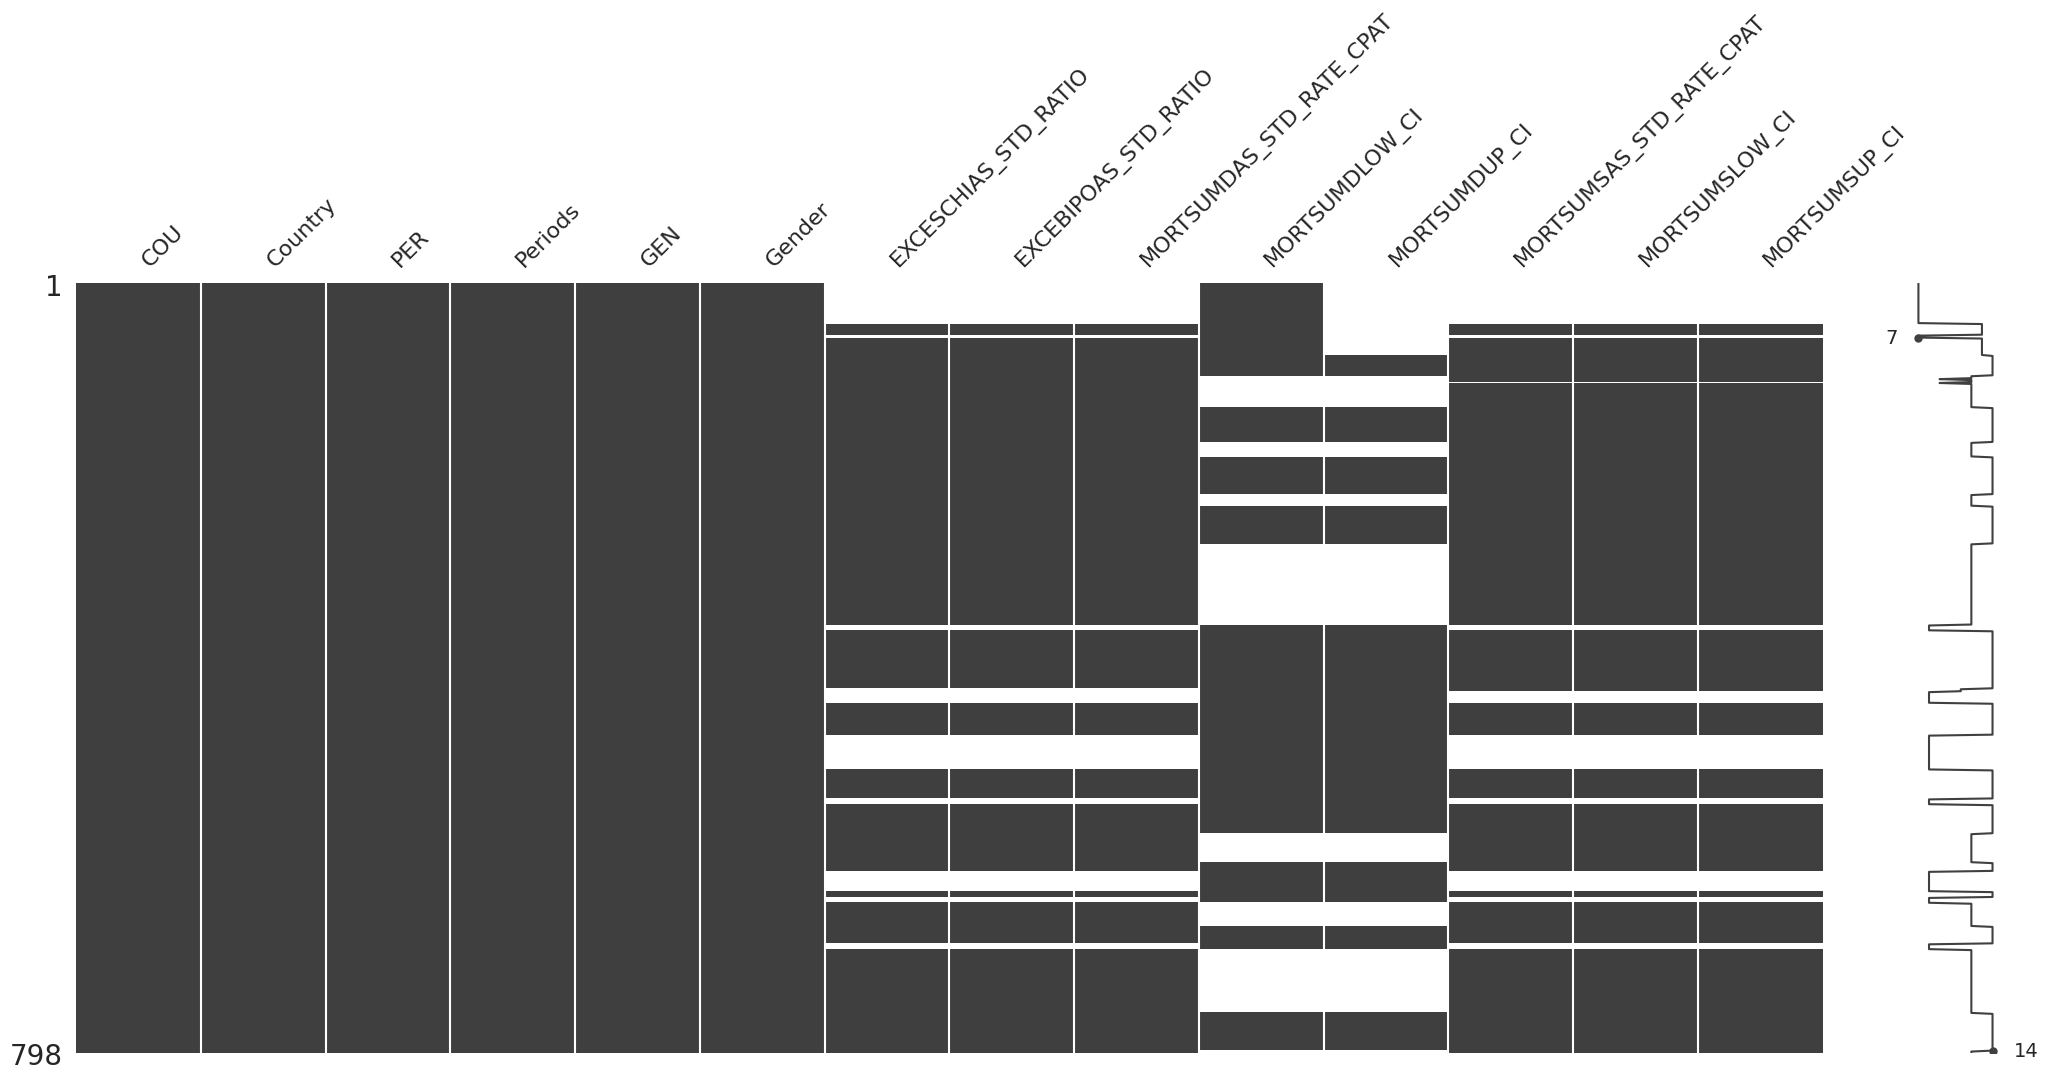

In [ ]:
# The msno.matrix() function creates a matrix plot where each column represents a variable, and each row represents an observation (or data point). The white lines in the plot represent missing values. This visualization can help you quickly identify which variables have missing data and whether there are any patterns or clusters of missing values.
# Customize the plot by adding labels, changing the color palette, or adjusting the size to suit your preferences. The missingno library also provides other functions like msno.bar() and msno.heatmap() for different types of missing data visualizations, depending on your needs.
# Create the missingness plot
msno.matrix(wide_dataset)
plt.show()

##**3. Visualizing the data:**


Few plots and graphs are displayed to find how data is distributed and how features are related to each other.

In [ ]:
df2 = wide_dataset[['Country', 'Periods', 'GEN', 'Gender',
                     'EXCESCHIAS_STD_RATIO', 'EXCEBIPOAS_STD_RATIO',
                     'MORTSUMDAS_STD_RATE_CPAT', #'MORTSUMDLOW_CI', 'MORTSUMDUP_CI',
                     'MORTSUMSAS_STD_RATE_CPAT', #'MORTSUMSLOW_CI', 'MORTSUMSUP_CI'
                     ]]

In [ ]:
# Eliminate Totals in the gender variable, to ease visualization
df2 = df2[df2.GEN != "T"]

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615:

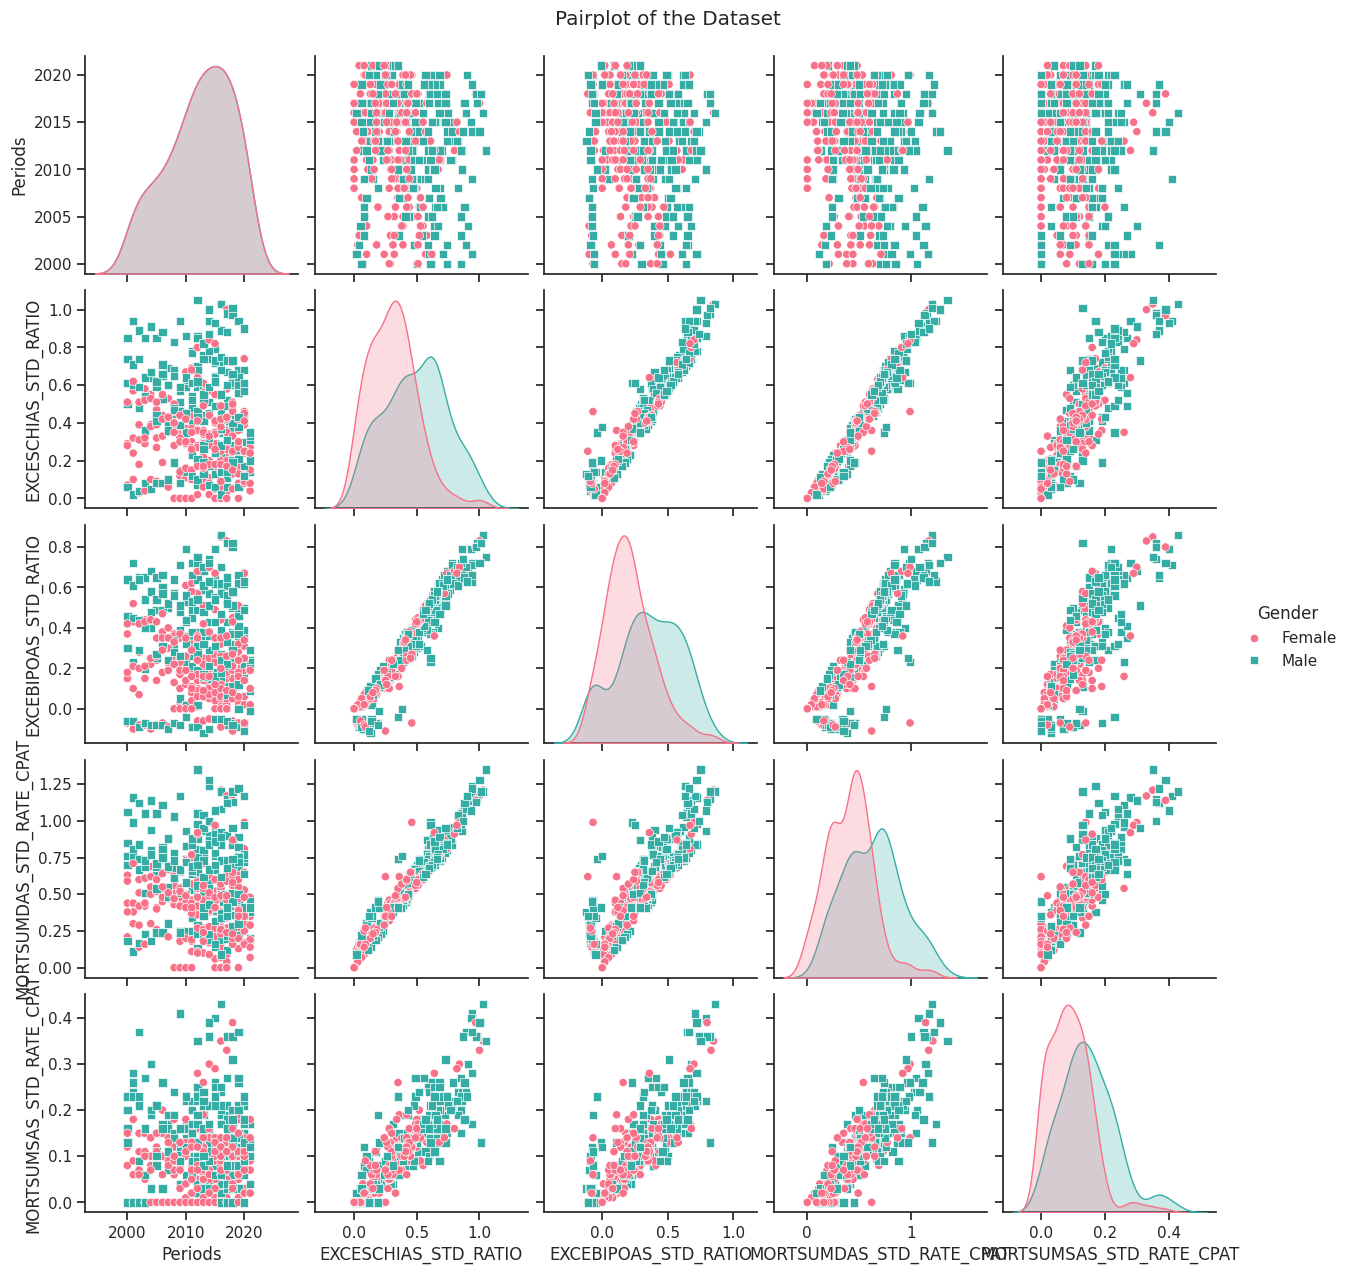

In [ ]:
# Set the style of the plot
sns.set(style="ticks")

# Create a pairplot
sns.pairplot(data=df2, hue='Gender', diag_kind='kde', markers=["o", "s", "D"], palette='husl')

# Customize the plot
plt.suptitle('Pairplot of the Dataset', y=1.02)  # Title at a specific position
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (19) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (19) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (19) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (19) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3

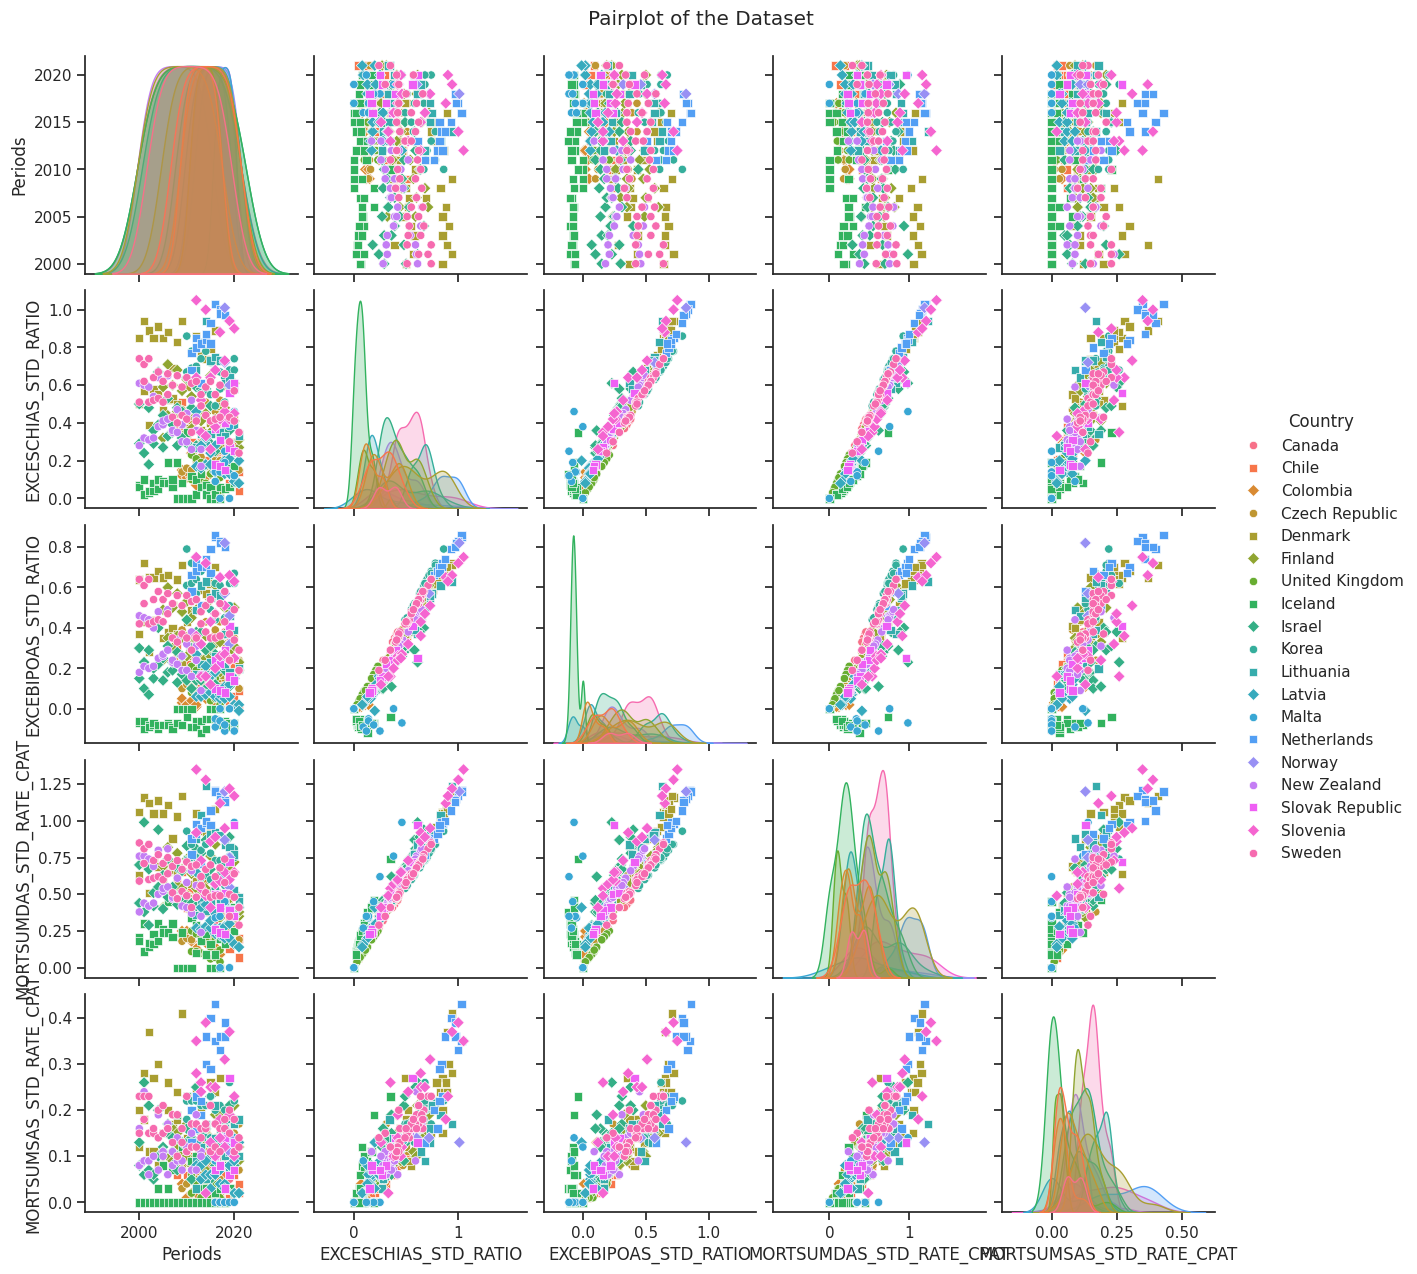

In [ ]:
# Set the style of the plot
sns.set(style="ticks")

# Create a pairplot
sns.pairplot(data=df2, hue='Country', diag_kind='kde', markers=["o", "s", "D"], palette='husl')

# Customize the plot
plt.suptitle('Pairplot of the Dataset', y=1.02)  # Title at a specific position
plt.show()

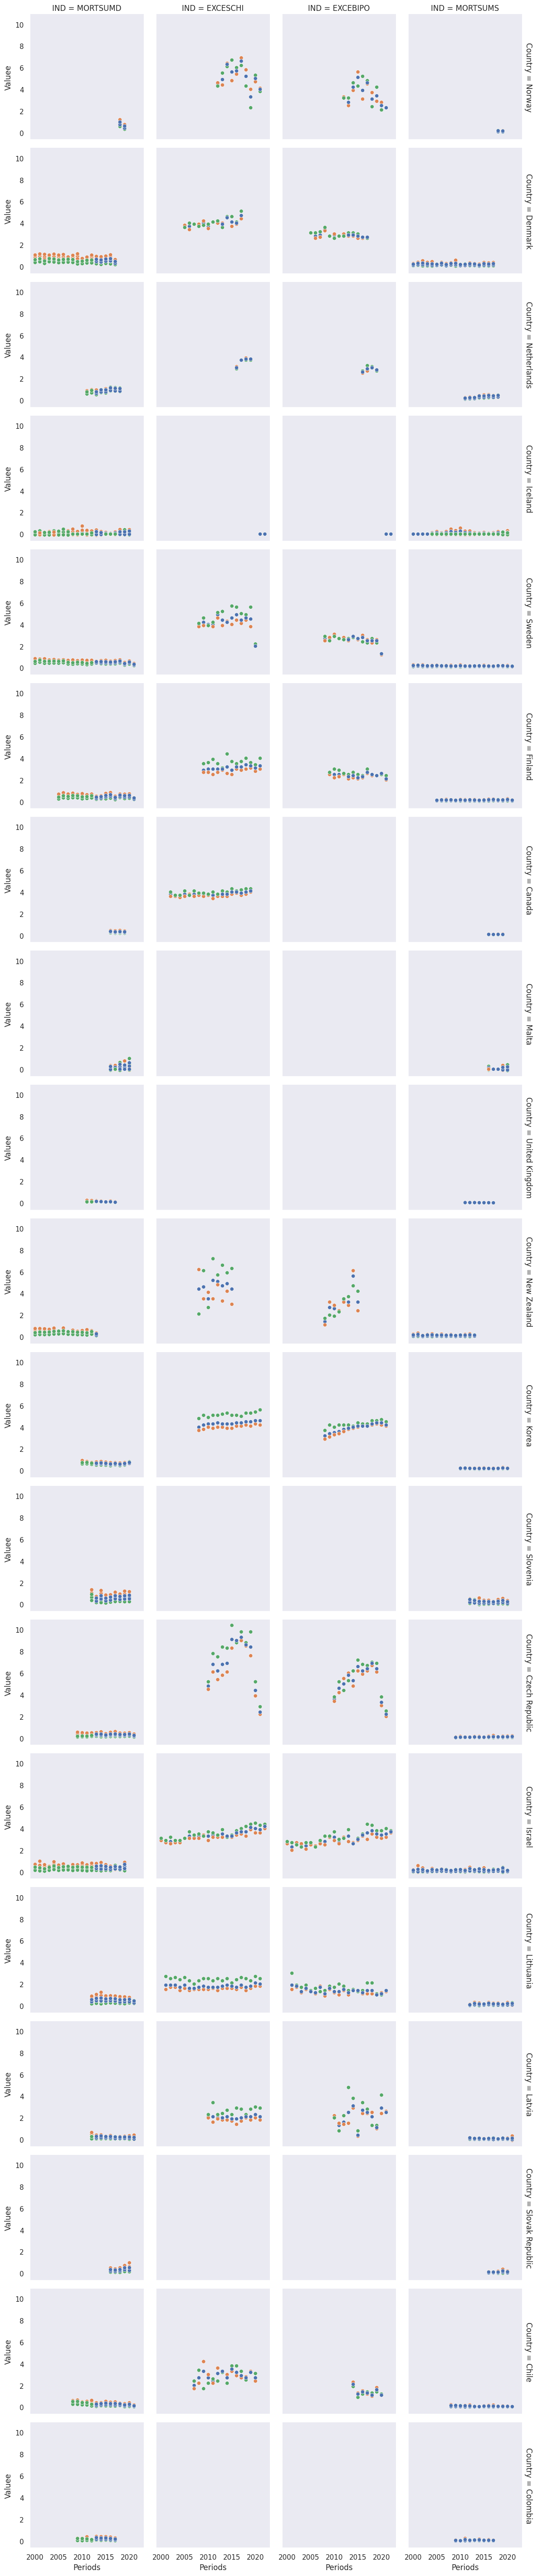

In [15]:
# FacetGrid for plotting each variable by COU, GEN, or Gender
g = sns.FacetGrid(dataset, col="IND", row="Country", margin_titles=True)
g.map(sns.scatterplot, 'Periods', 'Valuee', hue='Gender', data = dataset)

plt.show()

Periods  EXCESCHIAS_STD_RATIO  \
Periods                   1.000000             -0.101263   
EXCESCHIAS_STD_RATIO     -0.101263              1.000000   
EXCEBIPOAS_STD_RATIO     -0.075207              0.963317   
MORTSUMDAS_STD_RATE_CPAT -0.119905              0.972776   
MORTSUMDLOW_CI            0.137454             -0.025111   
MORTSUMDUP_CI             0.095830              0.016802   
MORTSUMSAS_STD_RATE_CPAT -0.032347              0.876245   
MORTSUMSLOW_CI           -0.016908              0.830028   
MORTSUMSUP_CI            -0.037898              0.762843   

                          EXCEBIPOAS_STD_RATIO  MORTSUMDAS_STD_RATE_CPAT  \
Periods                              -0.075207                 -0.119905   
EXCESCHIAS_STD_RATIO                  0.963317                  0.972776   
EXCEBIPOAS_STD_RATIO                  1.000000                  0.875275   
MORTSUMDAS_STD_RATE_CPAT              0.875275                  1.000000   
MORTSUMDLOW_CI                        0.069333                 -0.102864   
MORTSUMDUP_CI                         0.093003                 -0.049087   
MORTSUMSAS_STD_RATE_CPAT              0.827468                  0.867507   
MORTSUMSLOW_CI                        0.900289                  0.721060   
MORTSUMSUP_CI                         0.645769                  0.819729   

                          MORTSUMDLOW_CI  MORTSUMDUP_CI  \
Periods                         0.137454       0.095830   
EXCESCHIAS_STD_RATIO           -0.025111       0.016802   
EXCEBIPOAS_STD_RATIO            0.069333       0.093003   
MORTSUMDAS_STD_RATE_CPAT       -0.102864      -0.049087   
MORTSUMDLOW_CI                  1.000000       0.834177   
MORTSUMDUP_CI                   0.834177       1.000000   
MORTSUMSAS_STD_RATE_CPAT        0.007140       0.066435   
MORTSUMSLOW_CI                  0.149670       0.163958   
MORTSUMSUP_CI                  -0.094747      -0.016191   

                          MORTSUMSAS_STD_RATE_CPAT  MORTSUMSLOW_CI  \
Periods                                  -0.032347       -0.016908   
EXCESCHIAS_STD_RATIO                      0.876245        0.830028   
EXCEBIPOAS_STD_RATIO                      0.827468        0.900289   
MORTSUMDAS_STD_RATE_CPAT                  0.867507        0.721060   
MORTSUMDLOW_CI                            0.007140        0.149670   
MORTSUMDUP_CI                             0.066435        0.163958   
MORTSUMSAS_STD_RATE_CPAT                  1.000000        0.839019   
MORTSUMSLOW_CI                            0.839019        1.000000   
MORTSUMSUP_CI                             0.937188        0.599848   

                          MORTSUMSUP_CI  
Periods                       -0.037898  
EXCESCHIAS_STD_RATIO           0.762843  
EXCEBIPOAS_STD_RATIO           0.645769  
MORTSUMDAS_STD_RATE_CPAT       0.819729  
MORTSUMDLOW_CI                -0.094747  
MORTSUMDUP_CI                 -0.016191  
MORTSUMSAS_STD_RATE_CPAT       0.937188  
MORTSUMSLOW_CI                 0.599848  
MORTSUMSUP_CI                  1.000000

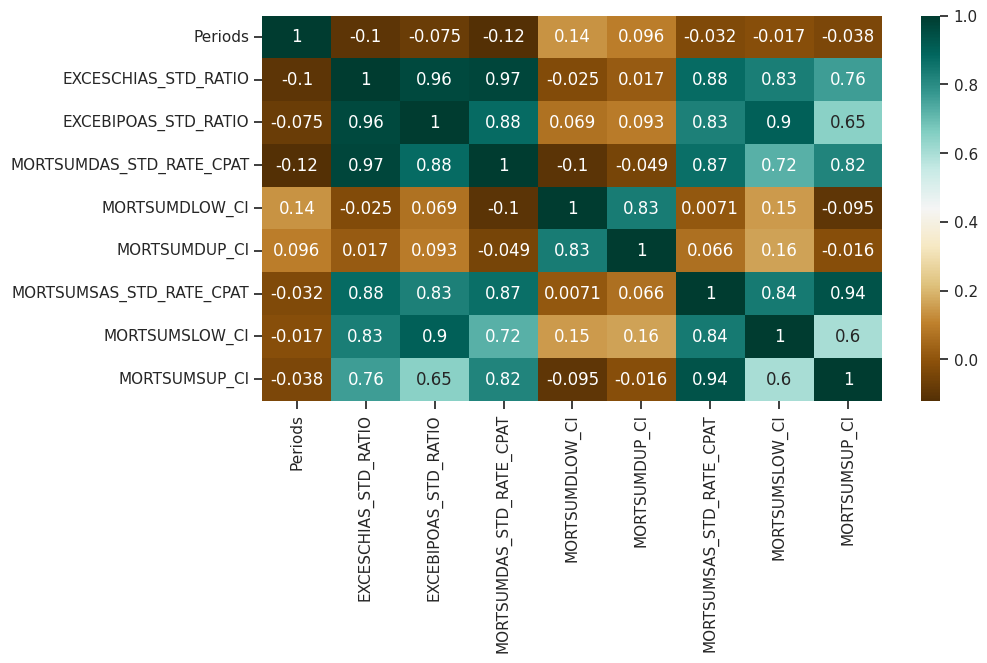

In [ ]:
# Visualize correlations between numerical variables

df3 = wide_dataset[['Periods', 'EXCESCHIAS_STD_RATIO', 'EXCEBIPOAS_STD_RATIO', 'MORTSUMDAS_STD_RATE_CPAT', 'MORTSUMDLOW_CI', 'MORTSUMDUP_CI','MORTSUMSAS_STD_RATE_CPAT', 'MORTSUMSLOW_CI', 'MORTSUMSUP_CI']]

plt.figure(figsize=(10,5))
c= df3.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

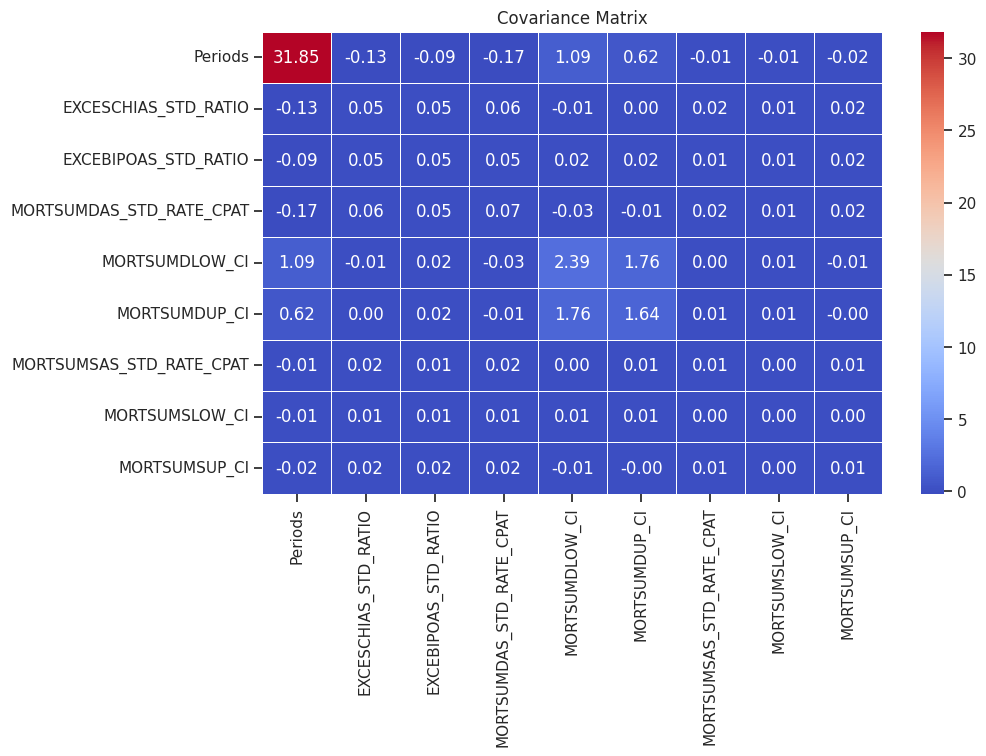

In [ ]:
# Calculate the covariance matrix
cov_matrix = df3.cov()

# Plot the covariance matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Covariance Matrix')
plt.show()

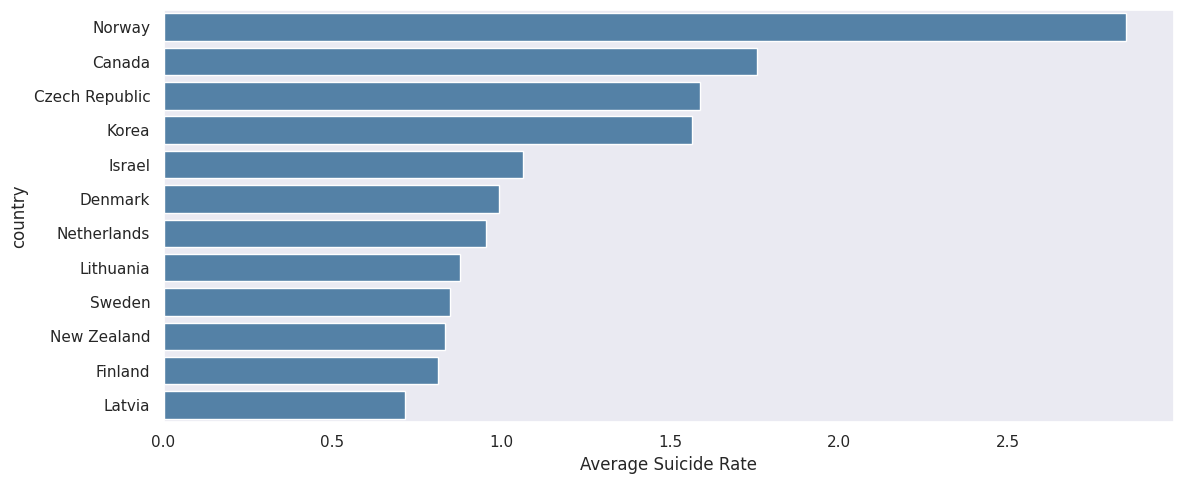

In [35]:
#  Average the rates and ratios for each country. This would give a more meaningful metric of the average rate of suicide in each country.
# This plot is not right since 'Valuee' values are in fact 8 different variables!
val = []
for country in dataset.Country.unique():
    val.append(dataset[dataset['Country'] == country]['Valuee'].mean())  # Use mean, not sum

val = pd.DataFrame(val, columns=['Average Suicide Rate'])
countries = pd.DataFrame(dataset.Country.unique(), columns=['country'])

val_suic = pd.concat([val, countries], axis=1)
val_suic = val_suic.sort_values(by='Average Suicide Rate', ascending=False)

fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(y=val_suic.country[:12], x=val_suic['Average Suicide Rate'][:12], color='steelblue')

plt.tight_layout()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


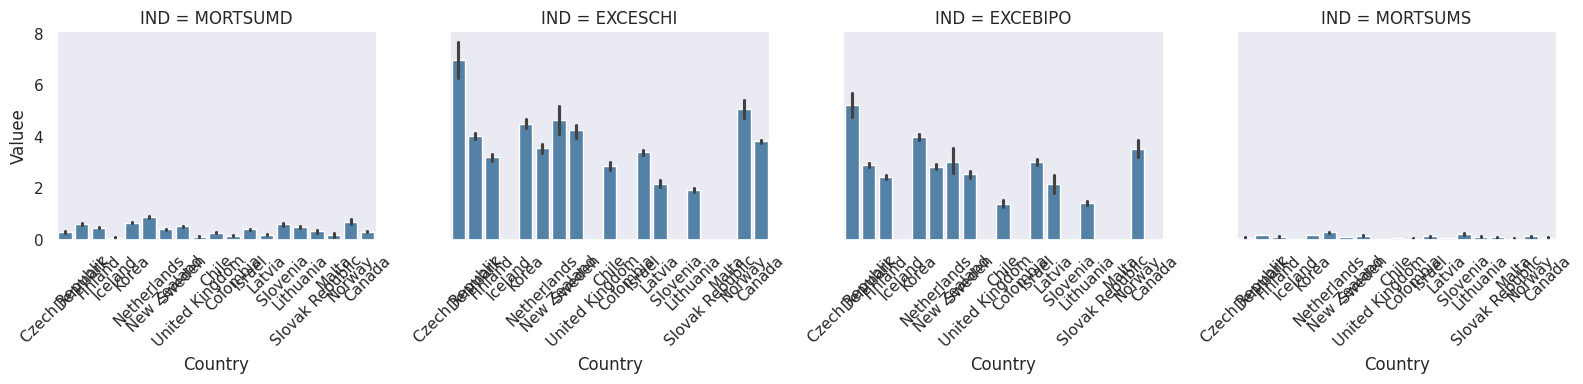

In [41]:
# This plot is better, showing the main 4 measures here: rates of suicide after discharge among people with mental disorder, and oxcess mortality ratio for people diagnosed with bipolar and schizophrenia.
g = sns.FacetGrid(dataset, col='IND', col_wrap=4, height=4, margin_titles=True)  # col_wrap=4 will create a 2x4 grid of plots
g.map(sns.barplot, 'Country', 'Valuee', color='steelblue', estimator='mean')  # Use 'mean' to get the average

# Rotate x-axis labels to make them readable
g.set_xticklabels(rotation=45)

plt.tight_layout()
plt.show()

### Lineplots over time

<Figure size 800x1000 with 0 Axes>

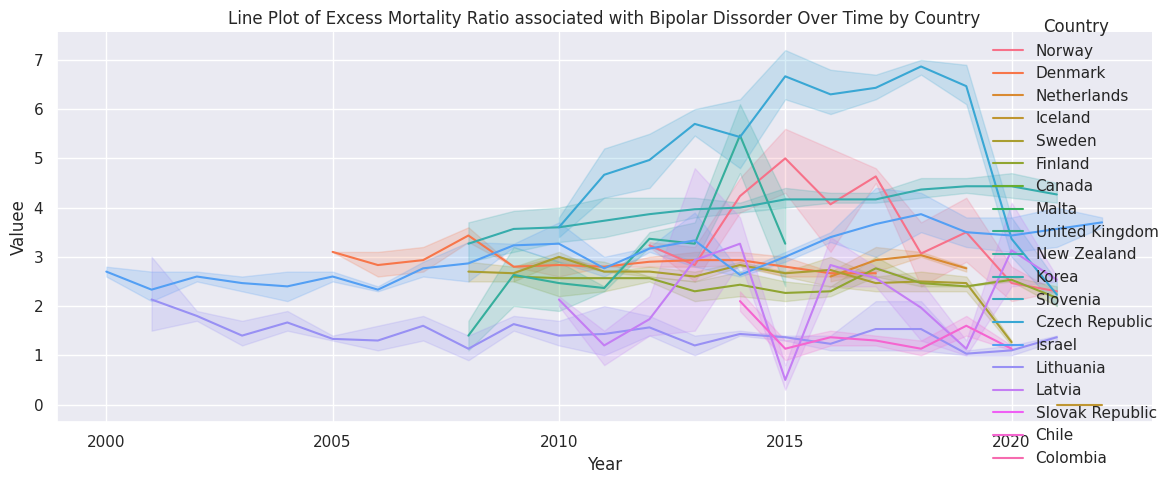

In [ ]:
# Group the data by 'Country' to create separate plots for each country
df = dataset[dataset["IND"]=="EXCEBIPO"]

# Set the style of the plot
sns.set(style="darkgrid")

# Create a line plot using seaborn's relplot
plt.figure(figsize=(8, 10))
sns.relplot(data=df, x='Periods', y='Valuee', hue='Country', kind='line', aspect=2)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Valuee')
plt.title('Line Plot of Excess Mortality Ratio associated with Bipolar Dissorder Over Time by Country')

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 800x1000 with 0 Axes>

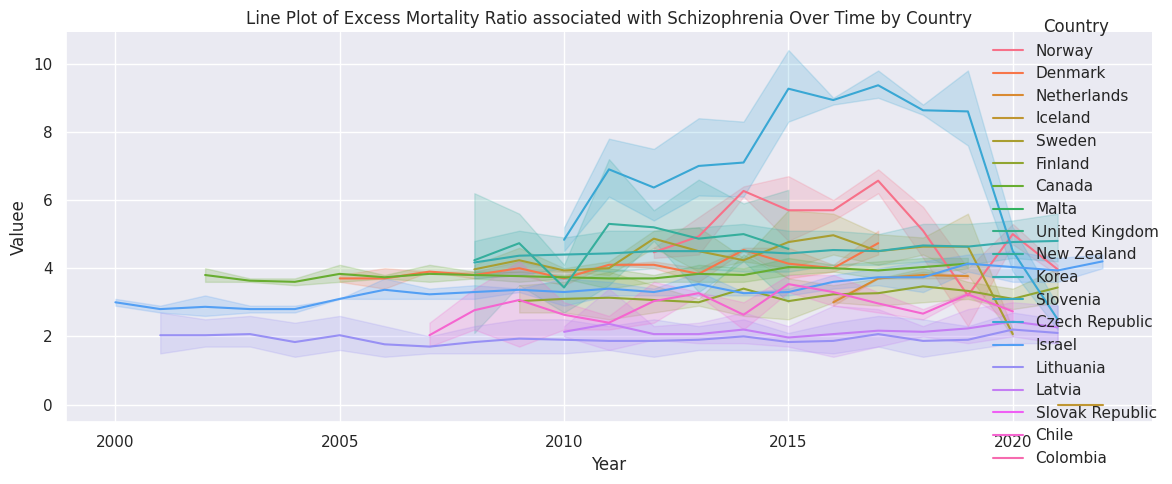

In [ ]:
# Group the data by 'Country' to create separate plots for each country
df = dataset[dataset["IND"]=="EXCESCHI"]

# Set the style of the plot
sns.set(style="darkgrid")

# Create a line plot using seaborn's relplot
plt.figure(figsize=(8, 10))
sns.relplot(data=df, x='Periods', y='Valuee', hue='Country', kind='line', aspect=2)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Valuee')
plt.title('Line Plot of Excess Mortality Ratio associated with Schizophrenia Over Time by Country')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
dataset.head()

Country  Periods       IND  \
0  Czech Republic     2009  MORTSUMD   
1  Czech Republic     2009  MORTSUMD   
2  Czech Republic     2009  MORTSUMD   
3  Czech Republic     2010  MORTSUMD   
4  Czech Republic     2010  MORTSUMD   

                                           Indicator GEN Gender  \
0  Suicide within 1 year after discharge among pa...   T  Total   
1  Suicide within 1 year after discharge among pa...   T  Total   
2  Suicide within 1 year after discharge among pa...   T  Total   
3  Suicide within 1 year after discharge among pa...   T  Total   
4  Suicide within 1 year after discharge among pa...   T  Total   

                VAL                                       Value  Valuee  
0  AS_STD_RATE_CPAT  Age-sex standardised rate per 100 patients    0.30  
1            LOW_CI                   Lower confidence interval    0.25  
2             UP_CI                   Upper confidence interval    0.34  
3  AS_STD_RATE_CPAT  Age-sex standardised rate per 100 patients    0.29  
4            LOW_CI                   Lower confidence interval    0.25

(657, 9)


<Figure size 800x1000 with 0 Axes>

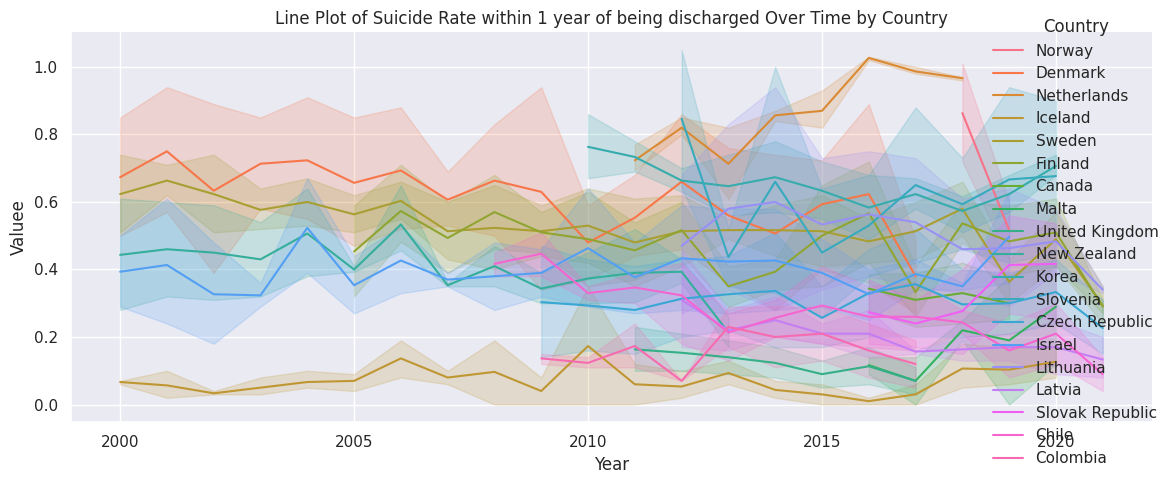

In [ ]:
# Group the data by 'Country' to create separate plots for each country
df = dataset[(dataset["IND"]=="MORTSUMD") & (dataset["VAL"]=="AS_STD_RATE_CPAT")]
print(df.shape)
# Set the style of the plot
sns.set(style="darkgrid")

# Create a line plot using seaborn's relplot
plt.figure(figsize=(8, 10))
sns.relplot(data=df, x='Periods', y='Valuee', hue='Country', kind='line', aspect=2)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Valuee')
plt.title('Line Plot of Suicide Rate within 1 year of being discharged Over Time by Country')

# Show the plot
plt.tight_layout()
plt.show()

(658, 9)


<Figure size 800x1000 with 0 Axes>

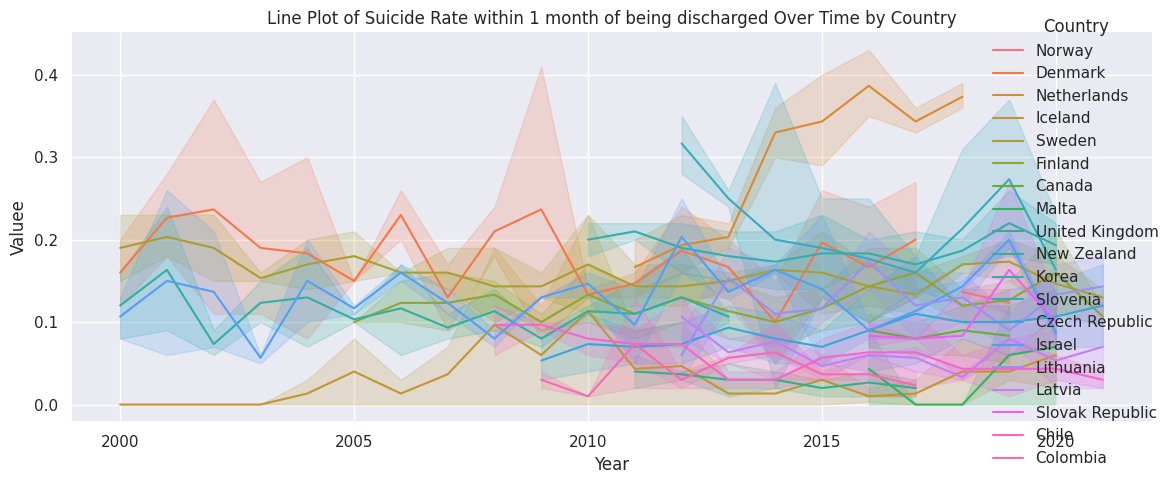

In [ ]:
# Group the data by 'Country' to create separate plots for each country
df = dataset[(dataset["IND"]=="MORTSUMS") & (dataset["VAL"]=="AS_STD_RATE_CPAT")]
print(df.shape)
# Set the style of the plot
sns.set(style="darkgrid")

# Create a line plot using seaborn's relplot
plt.figure(figsize=(8, 10))
sns.relplot(data=df, x='Periods', y='Valuee', hue='Country', kind='line', aspect=2)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Valuee')
plt.title('Line Plot of Suicide Rate within 1 month of being discharged Over Time by Country')

# Show the plot
plt.tight_layout()
plt.show()

### Israel, the country with most datapoints

In [ ]:
dataset_i = dataset[dataset.Country == 'Israel'].copy()

dataset_i.head()

Country  Periods       IND  \
240  Israel     2000  MORTSUMD   
241  Israel     2000  MORTSUMD   
242  Israel     2000  MORTSUMD   
243  Israel     2001  MORTSUMD   
244  Israel     2001  MORTSUMD   

                                             Indicator GEN Gender  \
240  Suicide within 1 year after discharge among pa...   T  Total   
241  Suicide within 1 year after discharge among pa...   T  Total   
242  Suicide within 1 year after discharge among pa...   T  Total   
243  Suicide within 1 year after discharge among pa...   T  Total   
244  Suicide within 1 year after discharge among pa...   T  Total   

                  VAL                                       Value  Valuee  
240  AS_STD_RATE_CPAT  Age-sex standardised rate per 100 patients    0.39  
241            LOW_CI                   Lower confidence interval    0.27  
242             UP_CI                   Upper confidence interval    0.51  
243  AS_STD_RATE_CPAT  Age-sex standardised rate per 100 patients    0.39  
244            LOW_CI                   Lower confidence interval    0.24

In [ ]:
dataset_i.Indicator.value_counts()

Suicide within 30 days after discharge among patients diagnosed with a mental disorder    189
Suicide within 1 year after discharge among patients diagnosed with a mental disorder     180
Excess mortality for patients diagnosed with schizophrenia                                 69
Excess mortality for patients diagnosed with bipolar disorder                              69
Name: Indicator, dtype: int64

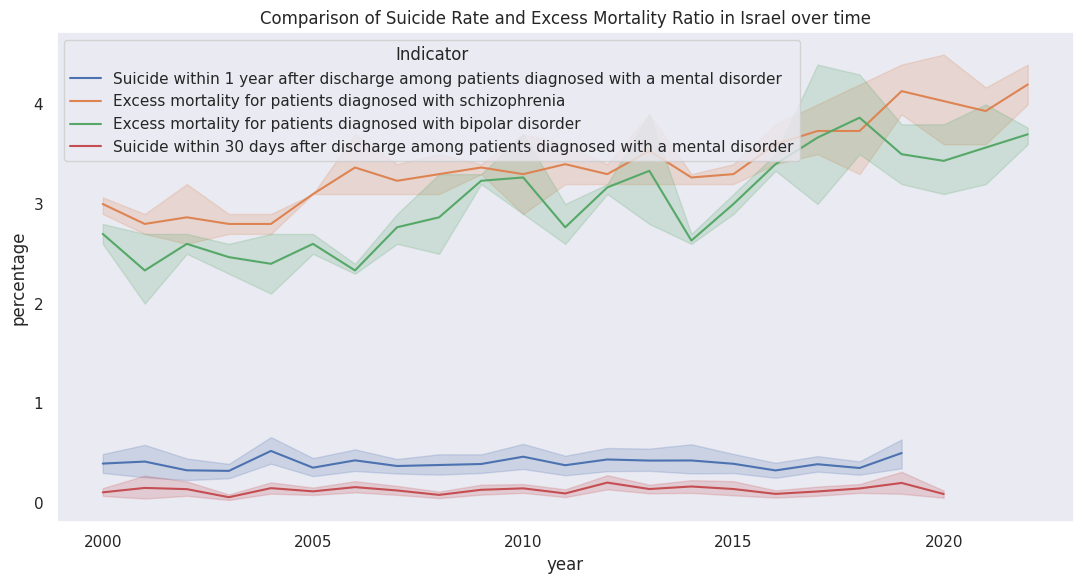

In [ ]:
#[ Write about what I am trying to do here...?]
fig, ax = plt.subplots(figsize = (11,6))
ax = sns.lineplot(data = dataset_i, x = 'Periods', y = 'Valuee', color = 'b', hue = 'Indicator')

plt.title('Comparison of Suicide Rate and Excess Mortality Ratio in Israel over time')
plt.xlabel('year')
plt.ylabel('percentage')
#plt.xlim(2000, 2022)

plt.tight_layout()

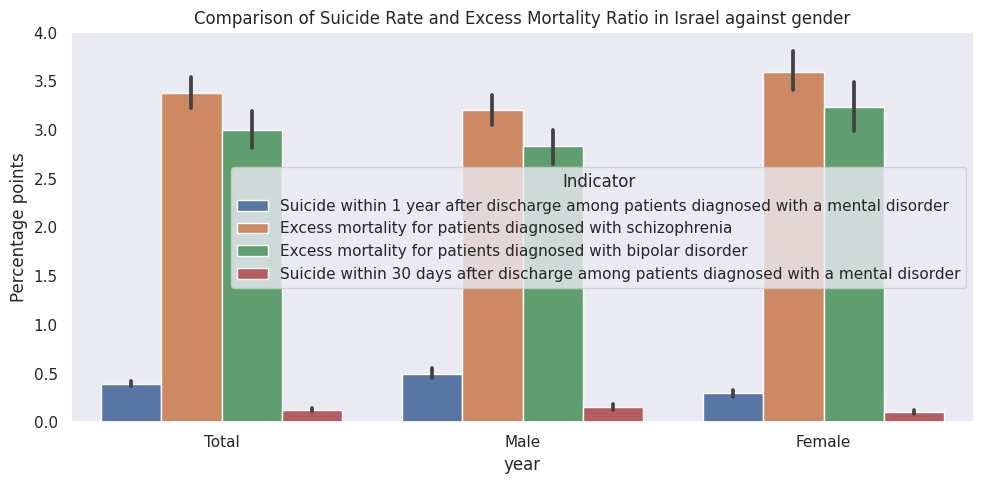

In [ ]:
#[ Write about what I am trying to do here...?]
fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(data = dataset_i, x = 'Gender', y = 'Valuee', hue = 'Indicator')
plt.title('Comparison of Suicide Rate and Excess Mortality Ratio in Israel against gender')
plt.xlabel('year')
plt.ylabel('Percentage points')

plt.tight_layout()

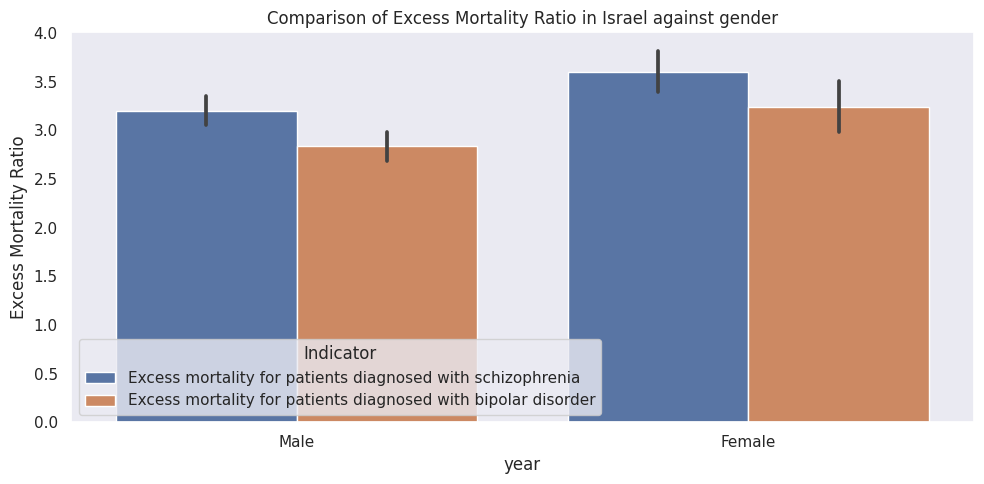

In [ ]:
#[ Write about what I am trying to do here...?]
fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(data = dataset_i[dataset_i["IND"].isin(["EXCESCHI", "EXCEBIPO"])], x = 'Gender', y = 'Valuee', hue = 'Indicator')
plt.title('Comparison of Excess Mortality Ratio in Israel against gender')
plt.xlabel('year')
plt.ylabel('Excess Mortality Ratio')
plt.tight_layout()

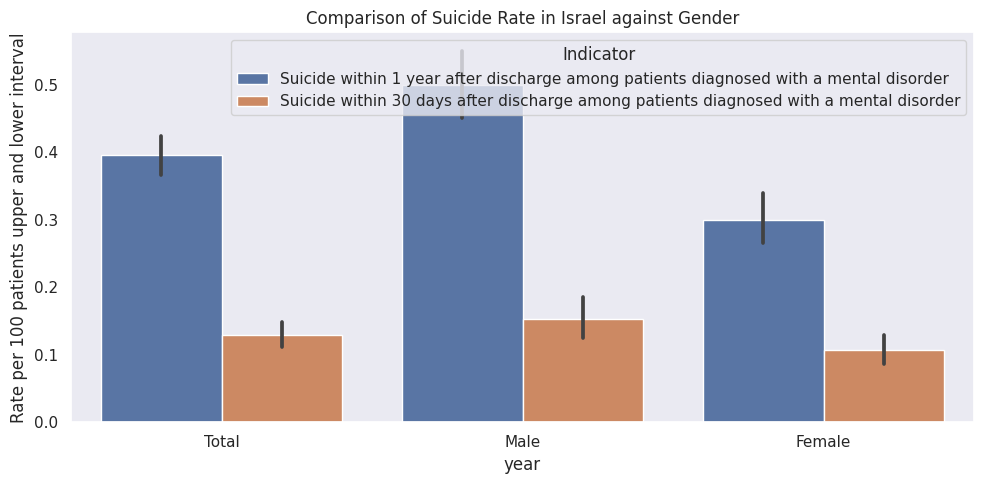

In [ ]:
#[ Write about what I am trying to do here...?]
fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(data = dataset_i[dataset_i["IND"].isin(["MORTSUMD", "MORTSUMS"])], x = 'Gender', y = 'Valuee', hue = 'Indicator')
plt.title('Comparison of Suicide Rate in Israel against Gender')
plt.xlabel('year')
plt.ylabel('Rate per 100 patients upper and lower interval')
plt.tight_layout()

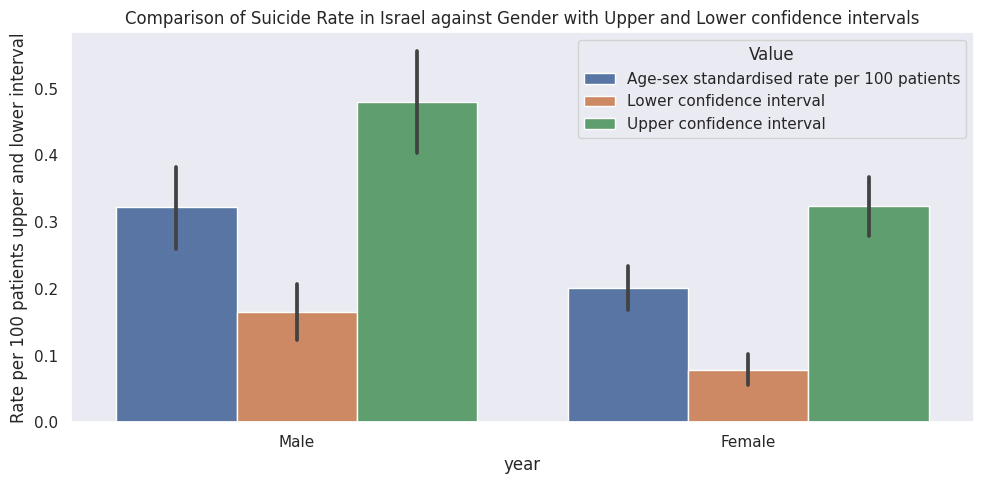

In [ ]:
#[ Write about what I am trying to do here...?]
fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(data = dataset_i[dataset_i["IND"].isin(["MORTSUMD", "MORTSUMS"])], x = 'Gender', y = 'Valuee', hue = 'Value')
plt.title('Comparison of Suicide Rate in Israel against Gender with Upper and Lower confidence intervals')
plt.xlabel('year')
plt.ylabel('Rate per 100 patients upper and lower interval')
plt.tight_layout()

In [ ]:
dataset_i = dataset_i[dataset_i.GEN != "T"]

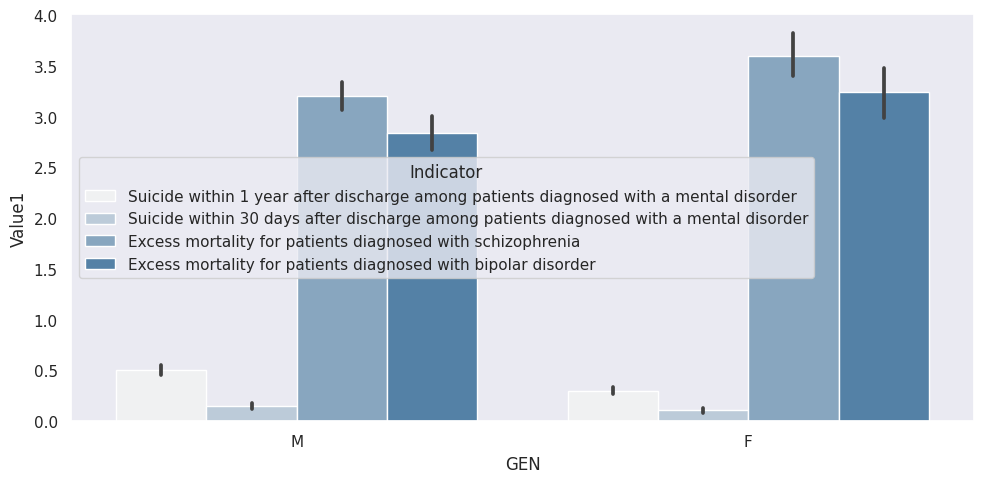

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))

sns.barplot(data = dataset_i, x = 'GEN', y = 'Valuee', hue = 'Indicator', color='steelblue')

plt.tight_layout()

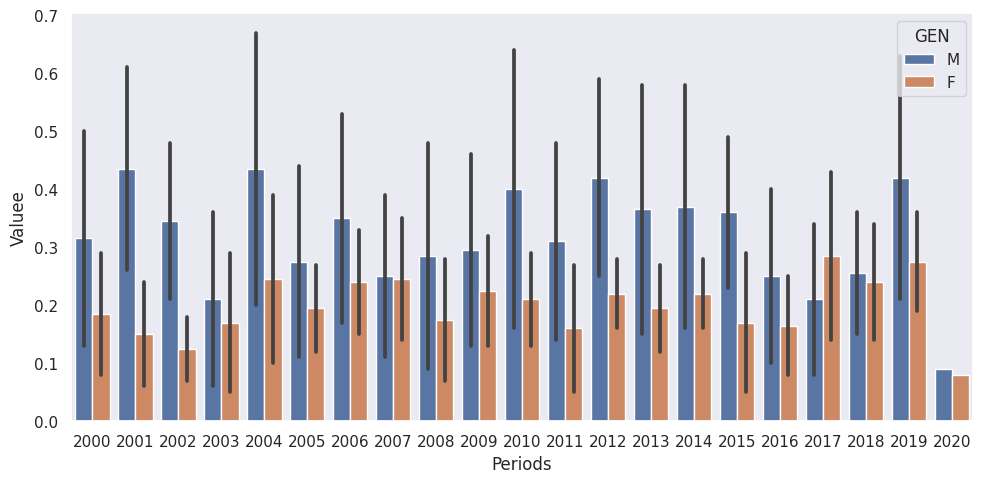

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))

sns.barplot(data = dataset_i[dataset_i["IND"].isin(["MORTSUMD", "MORTSUMS"]) & (dataset_i["VAL"]=="AS_STD_RATE_CPAT")], x = 'Periods', y = 'Valuee', hue = 'GEN') #color='steelblue' makes some categories almost invisible

plt.tight_layout()

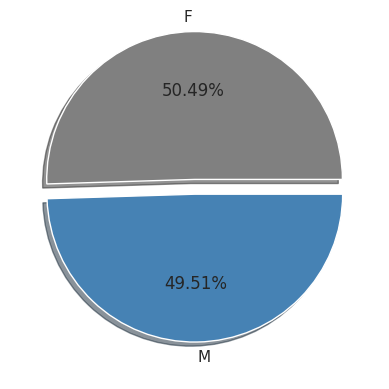

In [ ]:
dataset = dataset.groupby('GEN')['Valuee'].sum()

plt.pie(dataset, labels = dataset.index,autopct='%.2f%%', shadow=True, colors = ['gray', 'steelblue'], explode=[0.1, 0]);

In [ ]:
dataset.head()

GEN
F    182.09
M    178.57
Name: Value1, dtype: float64

##**Final Conclusion:**
In this project, learn how to work with different machine learning models on a set of data and understand their parameters. Creating this notebook helped me learn a lot about model parameters, how to tune them, and how they affect model performance. The final conclusion from the suicide dataset is that, regardless of age group and generation, the male population in each country is more likely to commit suicide than the female population.